<a href="https://colab.research.google.com/github/vorobieva/validate_de_novo_designed_proteins/blob/main/Code/analysis_fig_2D%2CE_and_Fig_3C%2CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount google drive
from google.colab import drive
drive.mount('/content/google_drive')

Drive already mounted at /content/google_drive; to attempt to forcibly remount, call drive.mount("/content/google_drive", force_remount=True).


In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

input_dir = '/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/sequences_designs_TMB8.fasta' #@param {type:"string"}
result_AF3 = '/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/results_3recycles' #@param {type:"string"}
result_AF48 = '/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/results_48recycles' #@param {type:"string"}
result_ESMF = '/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/results_ESMF' #@param {type:"string"}


In [ ]:
inputs=[]
with open(input_dir, "r") as in_f:
  for line in in_f:
    if line.startswith(">"):
      inputs.append(line[1:].strip())
    else:
      pass
print(inputs)

['TMB0.1b', 'TMB0.2b', 'TMB0.3b', 'TMB0.4b', 'TMB0.5b', 'TMB0.6b', 'TMB0.7b', 'TMB0.8b', 'TMB0.9b', 'TMB0.1', 'TMB0.2', 'TMB0.3', 'TMB0.4', 'TMB0.5', 'TMB0.6', 'TMB0.7', 'TMB0.8', 'TMB0.9', 'TMB1.1', 'TMB1.2', 'TMB1.3', 'TMB1.4', 'TMB1.5', 'TMB1.6', 'TMB1.7', 'TMB1.8', 'TMB1.9', 'TMB1.10', 'TMB1.11', 'TMB1.12', 'TMB1.13', 'TMB1.14', 'TMB1.15', 'TMB1.16', 'TMB1.1b', 'TMB1.2b', 'TMB1.3b', 'TMB1.4b', 'TMB1.5b', 'TMB1.6b', 'TMB1.7b', 'TMB1.8b', 'TMB1.9b', 'TMB1.10b', 'TMB1.11b', 'TMB1.12b', 'TMB1.13b', 'TMB1.14b', 'TMB1.15b', 'TMB1.16b', 'TMB2.1', 'TMB2.2', 'TMB2.3', 'TMB2.4', 'TMB2.5', 'TMB2.6', 'TMB2.7', 'TMB2.8', 'TMB2.9', 'TMB2.10', 'TMB2.11', 'TMB2.12', 'TMB2.13', 'TMB2.14', 'TMB2.15', 'TMB2.16', 'TMB2.17', 'TMB2.18', 'TMB2.19', 'TMB2.20', 'TMB2.21', 'TMB2.22', 'TMB2.23', 'TMB2.24', 'TMB2.25', 'TMB2.26', 'TMB2.27', 'TMB2.28', 'TMB2.29', 'TMB2.30', 'TMB2.31', 'TMB2.32', 'TMB2.33', 'TMB2.34', 'TMB2.35', 'TMB2.36', 'TMB2.37', 'TMB2.38', 'TMB2.39', 'TMB2.40', 'TMB2.41', 'TMB2.42', 'TMB2.4

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import json
import numpy as np

%matplotlib inline

In [ ]:
def permutation_test(dis1,dis2,n_permutations):
  n, k = len(dis1), 0
  diff = np.abs(np.mean(dis1) - np.mean(dis2))
  stats = np.zeros(n_permutations)
  all_dis = np.concatenate([dis1, dis2])
  for j in range(n_permutations):
    np.random.shuffle(all_dis)
#    labels = np.random.permutation((df['Group'] == 'treatment').values)
    k += diff < np.abs(np.mean(all_dis[:n]) - np.mean(all_dis[n:]))
#    stats[k] = np.mean(income[labels]) - np.mean(income[labels==False])
  p_value = k / n_permutations
  return(p_value)
#print(f"Permutation test: p-value={p_value:.4f}")

In [ ]:
dict_AF3 = {}
dict_AF48 = {}
dict_ESMF = {}

for input in inputs:
    if input.split(".")[0] == "TMB2":
        models48 = []
        for i in range(1,6):
            for f in glob.glob(result_AF48+"/"+input+"_unrelaxed_rank_"+str(i)+"*_scores.json"):
                with open(f, "r") as in_f:
                    data = json.load(in_f)
                    models48.append(sum(data['plddt'])/len(data['plddt']))
        dict_AF48[input] = models48
    models3 = []
    for i in range(1,6):
        for f in glob.glob(result_AF3+"/"+input+"_unrelaxed_rank_"+str(i)+"*_scores.json"):
            with open(f, "r") as in_f:
                data = json.load(in_f)
                models3.append(sum(data['plddt'])/len(data['plddt']))
    dict_AF3[input] = models3
    for f in glob.glob(result_ESMF+"/"+input.replace(".","_")+"_ESMF_*/*_default.pdb"):
        model_name = f.split("/")[-1]
        pLDDT = []
        pLDDT_backbone = []
        ptm = float(model_name.split("_")[0].replace("ptm",''))
        with open(f, "r") as in_f:
            for line in in_f:
                if line.startswith("ATOM"):
                    vals = line.split()
                    if vals[2] in ["N","CA","C","O","CB"]:
                        pLDDT_backbone.append(float(vals[10]))
                    pLDDT.append(float(vals[10]))
        dict_ESMF[input] = [sum(pLDDT)/len(pLDDT), sum(pLDDT_backbone)/len(pLDDT_backbone),ptm]


print(dict_AF48)
print(dict_AF3)
print(dict_ESMF)

#    design = input[0:8]
#    if ".result" in folder:
#        prediction = folder[0:14]
#        models=[]
#        for i in range(1,6):
#            for f in glob.glob(folder+prediction+"_unrelaxed_rank_"+str(i)+"*_scores.json"):
#                with open(f, "r") as in_f:
#                    data = json.load(in_f)
#            models.append(sum(data['plddt'])/len(data['plddt']))
#        dict_AF[design] = models
#    elif "ESMF" in folder:
#        for f in glob.glob(folder+"*_default.pdb"):
#            pLDDT = []
#            pLDDT_backbone = []
#            with open(f, "r") as in_f:
#                for line in in_f:
#                    if line.startswith("ATOM"):
#                        vals = line.split()
#                        if vals[2] in ["N","CA","C","O","CB"]:
#                            pLDDT_backbone.append(float(vals[10]))
#                        pLDDT.append(float(vals[10]))
#            dict_ESMF[design] = [sum(pLDDT)/len(pLDDT), sum(pLDDT_backbone)/len(pLDDT_backbone)]
#print(dict_AF)
#print(dict_ESMF)



{'TMB2.1': [46.9491935483871, 38.321370967741956, 31.246129032258054, 29.921693548387108, 29.797661290322576], 'TMB2.2': [87.16709677419357, 71.7099193548387, 66.70491935483872, 47.6718548387097, 36.08951612903228], 'TMB2.3': [91.01266129032257, 73.75241935483872, 48.20250000000001, 46.99193548387096, 34.887580645161286], 'TMB2.4': [85.78298387096774, 75.36306451612907, 33.709193548387105, 31.991209677419373, 30.299838709677413], 'TMB2.5': [85.30193548387098, 82.26653225806452, 39.72298387096775, 37.584435483870955, 31.658145161290324], 'TMB2.6': [88.02911290322577, 61.98209677419354, 39.69870967741936, 35.760725806451624, 33.00112903225807], 'TMB2.7': [60.43104838709673, 43.94032258064516, 38.12177419354838, 32.19854838709677, 29.915403225806447], 'TMB2.8': [80.27137096774193, 48.31201612903224, 36.81645161290321, 32.53040322580646, 31.09693548387095], 'TMB2.9': [67.89233870967743, 64.8766935483871, 49.523548387096774, 39.64790322580646, 31.261370967741946], 'TMB2.10': [90.46008064516

In [ ]:
dict_rmsd_ESM = {'TMB0.1b':1.25, 'TMB0.2b':1.25, 'TMB0.3b':1.39, 'TMB0.4b':1.27, 'TMB0.5b':1.73, 'TMB0.6b':1.42, 'TMB0.7b':1.10, 'TMB0.8b':1.70, 'TMB0.9b':1.55, 'TMB0.1':1.10, 'TMB0.2':1.21, 'TMB0.3':1.31, 'TMB0.4':1.24, 'TMB0.5':1.58, 'TMB0.6':1.39, 'TMB0.7':1.07, 'TMB0.8':1.53, 'TMB0.9':1.35, 'TMB1.1':1.20, 'TMB1.2':1.09, 'TMB1.3':1.21, 'TMB1.4':1.11, 'TMB1.5':1.01, 'TMB1.6':1.26, 'TMB1.7':1.59, 'TMB1.8':1.26, 'TMB1.9':1.10, 'TMB1.10':1.11, 'TMB1.11':1.15, 'TMB1.12':1.29, 'TMB1.13':1.30, 'TMB1.14':1.19, 'TMB1.15':1.06, 'TMB1.16':1.34, 'TMB1.1b':1.43, 'TMB1.2b':1.16, 'TMB1.3b':1.51, 'TMB1.4b':1.38, 'TMB1.5b':1.15, 'TMB1.6b':1.55, 'TMB1.7b':1.23, 'TMB1.8b':1.34, 'TMB1.9b':1.31, 'TMB1.10b':1.35, 'TMB1.11b':1.33, 'TMB1.12b':1.39, 'TMB1.13b':1.20, 'TMB1.14b':1.29, 'TMB1.15b':1.17, 'TMB1.16b':1.38, 'TMB2.1':1.47, 'TMB2.2':1.61, 'TMB2.3':1.08, 'TMB2.4':0.88, 'TMB2.5':0.95, 'TMB2.6':0.69, 'TMB2.7':0.78, 'TMB2.8':0.80, 'TMB2.9':1.25, 'TMB2.10':1.43, 'TMB2.11':1.29, 'TMB2.12':1.48, 'TMB2.13':1.53, 'TMB2.14':0.94, 'TMB2.15':0.97, 'TMB2.16':0.93, 'TMB2.17':1.06, 'TMB2.18':1.47, 'TMB2.19':1.26, 'TMB2.20':0.99, 'TMB2.21':0.90, 'TMB2.22':0.93, 'TMB2.23':1.29, 'TMB2.24':1.21, 'TMB2.25':1.08, 'TMB2.26':0.84, 'TMB2.27':0.91, 'TMB2.28':0.91, 'TMB2.29':1.08, 'TMB2.30':1.15, 'TMB2.31':1.24, 'TMB2.32':0.89, 'TMB2.33':1.00, 'TMB2.34':1.06, 'TMB2.35':1.17, 'TMB2.36':1.07, 'TMB2.37':1.20, 'TMB2.38':1.50, 'TMB2.39':1.45, 'TMB2.40':1.97, 'TMB2.41':0.97, 'TMB2.42':1.33, 'TMB2.43':1.10, 'TMB2.44':1.33, 'TMB2.45':1.24, 'TMB2.46':1.10, 'TMB2.47':0.84, 'TMB2.48':0.92, 'TMB2.49':1.08, 'TMB2.50':0.99, 'TMB2.51':1.44, 'TMB2.52':1.76, 'TMB2.53':1.47, 'TMB2.54':1.12, 'TMB2.55':1.27, 'TMB2.56':1.16, 'TMB2.57':0.88, 'TMB2.58':1.54, 'TMB2.59':1.44, 'TMB2.60':1.32, 'TMB2.61':1.09, 'TMB2.62':0.79, 'TMB2.63':1.39, 'TMB2.64':1.56, 'TMB2.65':1.20, 'TMB2.66':1.75, 'TMB2.67':1.16, 'TMB2.68':1.09, 'TMB2.69':0.99, 'TMB2.70':1.18, 'TMB2.71':1.11, 'TMB2.72':1.61, 'TMB2.73':1.29, 'TMB2.74':1.41, 'TMB2.75':1.19, 'TMB2.76':1.07, 'TMB2.77':1.03, 'TMB2.78':1.09, 'TMB2.79':1.37, 'TMB2.80':1.16, 'TMB2.81':1.19, 'TMB2.82':1.34, 'TMB2.83':1.32, 'TMB2.84':1.25, 'TMB2.85':1.15, 'TMB2.86':1.00, 'TMB2.87':1.06, 'TMB2.88':1.56, 'TMB2.89':1.01, 'TMB2.90':1.18}


In [ ]:
dict_seq_prop = {'TMB0.1b':[151.02,62.096774193548384], 'TMB0.2b':[202.42,62.096774193548384], 'TMB0.3b':[41.89,62.903225806451616], 'TMB0.4b':[172.63,62.096774193548384], 'TMB0.5b':[206.22,61.29032258064516], 'TMB0.6b':[340.44,58.06451612903226], 'TMB0.7b':[134.57,59.67741935483871], 'TMB0.8b':[30.15,62.903225806451616], 'TMB0.9b':[68.05,62.096774193548384], 'TMB0.1':[168.82,63.70967741935484], 'TMB0.2':[228.94,63.70967741935484], 'TMB0.3':[39.31,62.096774193548384], 'TMB0.4':[190.92,62.903225806451616], 'TMB0.5':[212.34,62.903225806451616], 'TMB0.6':[424.11,61.29032258064516], 'TMB0.7':[77.52,64.51612903225806], 'TMB0.8':[32.92,63.70967741935484], 'TMB0.9':[119.84,62.096774193548384], 'TMB1.1':[35.08,51.61290322580645], 'TMB1.2':[40.55,50.806451612903224], 'TMB1.3':[63.08,55.64516129032258], 'TMB1.4':[187.56,53.2258064516129], 'TMB1.5':[204.92,53.2258064516129], 'TMB1.6':[263.15,57.25806451612904], 'TMB1.7':[130.77,60.483870967741936], 'TMB1.8':[189.77,54.83870967741935], 'TMB1.9':[399.95,57.25806451612904], 'TMB1.10':[265.95,56.451612903225815], 'TMB1.11':[62.73,58.06451612903226], 'TMB1.12':[64.94,59.67741935483871], 'TMB1.13':[254.85,50.806451612903224], 'TMB1.14':[84.50,53.2258064516129], 'TMB1.15':[192.49,58.87096774193549], 'TMB1.16':[202.87,53.2258064516129], 'TMB1.1b':[46.71,46.774193548387096], 'TMB1.2b':[39.79,41.935483870967744], 'TMB1.3b':[63.31,54.03225806451613], 'TMB1.4b':[166.98,38.70967741935484], 'TMB1.5b':[277.37,51.61290322580645], 'TMB1.6b':[257.06,52.41935483870967], 'TMB1.7b':[110.41,57.25806451612904], 'TMB1.8b':[154.56,53.2258064516129], 'TMB1.9b':[333.45,50.806451612903224], 'TMB1.10b':[263.59,56.451612903225815], 'TMB1.11b':[58.18,55.64516129032258], 'TMB1.12b':[69.98,54.03225806451613], 'TMB1.13b':[101.28,46.774193548387096], 'TMB1.14b':[78.45,49.193548387096776], 'TMB1.15b':[193.90,55.64516129032258], 'TMB1.16b':[268.28,50.0], 'TMB2.1':[55.33,44.354838709677416], 'TMB2.2':[572.42,19.35483870967742], 'TMB2.3':[230.78,45.16129032258064], 'TMB2.4':[1170.79,27.419354838709676], 'TMB2.5':[1049.29,36.29032258064516], 'TMB2.6':[514.01,39.516129032258064], 'TMB2.7':[409.31,30.64516129032258], 'TMB2.8':[842.37,40.32258064516129], 'TMB2.9':[253.89,41.12903225806452], 'TMB2.10':[1973.13,38.70967741935484], 'TMB2.11':[2428.63,47.58064516129033], 'TMB2.12':[494.25,35.483870967741936], 'TMB2.13':[2394.02,42.74193548387097], 'TMB2.14':[1097.65,43.54838709677419], 'TMB2.15':[1255.72,46.774193548387096], 'TMB2.16':[2989.43,42.74193548387097], 'TMB2.17':[835.79,45.16129032258064], 'TMB2.18':[1222.47,34.67741935483871], 'TMB2.19':[606.45,48.38709677419355], 'TMB2.20':[699.99,42.74193548387097], 'TMB2.21':[807.99,45.96774193548387], 'TMB2.22':[102.40,41.12903225806452], 'TMB2.23':[520.92,30.64516129032258], 'TMB2.24':[332.17,45.16129032258064], 'TMB2.25':[803.43,41.935483870967744], 'TMB2.26':[1755.58,40.32258064516129], 'TMB2.27':[306.07,44.354838709677416], 'TMB2.28':[1145.00,40.32258064516129], 'TMB2.29':[1502.36,41.935483870967744], 'TMB2.30':[782.00,40.32258064516129], 'TMB2.31':[876.32,45.96774193548387], 'TMB2.32':[378.53,43.54838709677419], 'TMB2.33':[1468.18,29.03225806451613], 'TMB2.34':[1748.07,46.774193548387096], 'TMB2.35':[205.78,50.0], 'TMB2.36':[27.79,44.354838709677416], 'TMB2.37':[1167.15,41.12903225806452], 'TMB2.38':[16.77,33.064516129032256], 'TMB2.39':[785.09,25.806451612903224], 'TMB2.40':[1975.63,35.483870967741936], 'TMB2.41':[1497.31,34.67741935483871], 'TMB2.42':[1004.44,34.67741935483871], 'TMB2.43':[1032.97,43.54838709677419], 'TMB2.44':[1271.45,50.0], 'TMB2.45':[1719.85,48.38709677419355], 'TMB2.46':[1865.45,50.806451612903224], 'TMB2.47':[400.84,44.354838709677416], 'TMB2.48':[21.56,33.87096774193548], 'TMB2.49':[745.84,42.74193548387097], 'TMB2.50':[1603.85,37.096774193548384], 'TMB2.51':[1391.28,45.16129032258064], 'TMB2.52':[830.97,32.25806451612903], 'TMB2.53':[1236.66,52.41935483870967], 'TMB2.54':[509.53,41.935483870967744], 'TMB2.55':[716.35,31.451612903225808], 'TMB2.56':[48.25,21.774193548387096], 'TMB2.57':[1175.06,36.29032258064516], 'TMB2.58':[999.34,44.354838709677416], 'TMB2.59':[827.24,31.451612903225808], 'TMB2.60':[857.33,38.70967741935484], 'TMB2.61':[1027.17,52.41935483870967], 'TMB2.62':[899.28,35.483870967741936], 'TMB2.63':[118.44,37.096774193548384], 'TMB2.64':[1025.34,41.935483870967744], 'TMB2.65':[215.89,37.096774193548384], 'TMB2.66':[1167.41,45.16129032258064], 'TMB2.67':[376.72,33.064516129032256], 'TMB2.68':[1025.38,42.74193548387097], 'TMB2.69':[1415.88,42.74193548387097], 'TMB2.70':[412.38,37.903225806451616], 'TMB2.71':[1756.01,49.193548387096776], 'TMB2.72':[709.47,29.838709677419356], 'TMB2.73':[562.29,37.096774193548384], 'TMB2.74':[366.02,41.12903225806452], 'TMB2.75':[881.55,50.0], 'TMB2.76':[623.09,46.774193548387096], 'TMB2.77':[1191.92,41.935483870967744], 'TMB2.78':[840.31,44.354838709677416], 'TMB2.79':[859.56,47.58064516129033], 'TMB2.80':[1537.84,45.16129032258064], 'TMB2.81':[1012.80,42.74193548387097], 'TMB2.82':[51.79,41.935483870967744], 'TMB2.83':[1360.63,40.32258064516129], 'TMB2.84':[357.63,23.387096774193548], 'TMB2.85':[668.11,41.935483870967744], 'TMB2.86':[1342.79,33.87096774193548], 'TMB2.87':[1215.45,45.96774193548387], 'TMB2.88':[527.04,47.58064516129033], 'TMB2.89':[521.48,43.54838709677419], 'TMB2.90':[1881.08,46.774193548387096]}


In [ ]:
dict_rmsd_AF48 = {'TMB2.1':[3.44,5.21,4.18,5.75,4.87], 'TMB2.2':[3.79,2.87,2.79,4.17,4.11], 'TMB2.3':[1.85,4.12,3.83,2.82,4.23], 'TMB2.4':[1.80,1.86,5.62,4.74,5.34], 'TMB2.5':[1.48,2.38,5.28,4.72,5.06], 'TMB2.6':[1.75,3.83,3.42,5.41,4.67], 'TMB2.7':[5.14,4.77,5.41,4.83,4.80], 'TMB2.8':[2.43,4.98,4.05,5.25,4.61], 'TMB2.9':[2.35,4.23,4.88,3.80,5.70], 'TMB2.10':[2.66,2.75,2.46,1.98,2.50], 'TMB2.11':[2.60,4.22,4.48,4.62,5.07], 'TMB2.12':[4.92,3.65,4.94,5.23,5.17], 'TMB2.13':[1.67,1.99,4.11,3.22,4.60], 'TMB2.14':[2.05,1.97,3.91,3.62,4.79], 'TMB2.15':[5.33,5.41,5.32,5.05,3.60], 'TMB2.16':[1.76,3.47,4.72,5.34,4.28], 'TMB2.17':[1.57,1.69,3.63,4.83,5.42], 'TMB2.18':[1.91,3.72,2.71,3.00,4.97], 'TMB2.19':[1.81,1.99,3.58,3.37,3.25], 'TMB2.20':[4.15,3.96,5.27,4.96,4.63], 'TMB2.21':[3.80,2.10,2.21,3.63,5.35], 'TMB2.22':[2.62,1.62,2.31,2.69,4.18], 'TMB2.23':[1.97,4.59,5.04,3.30,4.41], 'TMB2.24':[3.82,3.64,3.97,2.62,2.10], 'TMB2.25':[1.76,3.39,4.27,4.92,5.31], 'TMB2.26':[1.84,5.22,5.36,4.66,4.91], 'TMB2.27':[1.70,5.13,5.67,4.65,4.83], 'TMB2.28':[1.61,4.67,4.57,4.02,5.94], 'TMB2.29':[1.57,1.67,3.77,3.64,4.31], 'TMB2.30':[3.24,5.29,4.40,4.98,5.59], 'TMB2.31':[1.63,2.23,1.52,2.85,4.67], 'TMB2.32':[3.88,2.39,4.12,3.57,4.51], 'TMB2.33':[1.55,2.31,4.05,3.94,4.23], 'TMB2.34':[1.76,2.80,3.97,4.64,4.31], 'TMB2.35':[1.91,0.97,4.25,5.01,5.27], 'TMB2.36':[2.06,2.66,5.04,4.13,5.00], 'TMB2.37':[3.96,3.07,4.09,5.05,4.72], 'TMB2.38':[5.64,5.21,6.07,5.44,4.21], 'TMB2.39':[1.98,2.00,3.03,5.55,4.49], 'TMB2.40':[2.07,2.05,2.30,4.69,4.59], 'TMB2.41':[1.56,1.64,1.58,3.91,3.76], 'TMB2.42':[2.02,2.02,3.40,5.20,4.21], 'TMB2.43':[1.81,1.80,2.58,4.60,5.28], 'TMB2.44':[3.92,2.05,2.41,3.10,5.10], 'TMB2.45':[2.25,2.26,2.45,2.50,4.89], 'TMB2.46':[1.94,1.94,2.46,3.89,5.24], 'TMB2.47':[4.09,1.96,3.80,3.88,4.54], 'TMB2.48':[5.07,4.54,5.15,4.19,5.39], 'TMB2.49':[1.84,3.99,4.06,4.79,5.52], 'TMB2.50':[1.51,4.99,4.59,4.56,5.66], 'TMB2.51':[2.22,2.64,4.01,4.93,5.14], 'TMB2.52':[2.38,3.94,3.43,3.56,3.06], 'TMB2.53':[5.21,4.68,5.56,5.22,5.60], 'TMB2.54':[3.66,4.64,5.29,4.94,6.07], 'TMB2.55':[4.54,5.46,4.75,5.27,4.84], 'TMB2.56':[1.51,1.62,2.77,5.31,4.58], 'TMB2.57':[1.70,2.84,3.22,4.16,4.08], 'TMB2.58':[1.83,3.75,3.18,3.78,4.75], 'TMB2.59':[1.74,1.83,1.70,2.77,2.98], 'TMB2.60':[2.10,2.11,5.45,4.80,5.54], 'TMB2.61':[1.87,1.80,1.75,2.00,2.77], 'TMB2.62':[1.74,1.87,5.33,3.08,4.12], 'TMB2.63':[4.09,4.10,4.32,4.01,4.46], 'TMB2.64':[1.70,4.73,4.84,4.85,4.49], 'TMB2.65':[1.84,1.99,1.98,2.15,4.04], 'TMB2.66':[2.09,5.04,4.69,5.27,5.28], 'TMB2.67':[2.14,2.03,4.68,4.23,4.35], 'TMB2.68':[3.99,3.85,5.27,3.35,4.87], 'TMB2.69':[2.21,3.96,2.35,4.27,4.25], 'TMB2.70':[1.68,1.82,1.55,4.43,4.25], 'TMB2.71':[1.84,1.71,3.75,3.88,4.37], 'TMB2.72':[2.02,4.91,4.38,4.53,3.86], 'TMB2.73':[4.13,5.00,3.44,3.54,4.90], 'TMB2.74':[1.88,4.60,3.10,5.09,3.64], 'TMB2.75':[2.09,3.81,3.96,3.06,3.40], 'TMB2.76':[1.84,1.67,1.72,1.57,1.79], 'TMB2.77':[2.05,3.51,3.51,3.97,3.78], 'TMB2.78':[4.36,4.37,4.98,4.49,4.96], 'TMB2.79':[2.14,2.17,2.22,3.63,4.43], 'TMB2.80':[2.76,1.94,5.24,3.34,5.37], 'TMB2.81':[2.11,1.94,3.48,3.95,5.49], 'TMB2.82':[1.68,1.93,2.06,5.29,5.37], 'TMB2.83':[1.69,1.63,1.67,2.43,1.91], 'TMB2.84':[1.89,1.92,2.29,3.54,4.71], 'TMB2.85':[1.64,1.71,3.91,2.68,3.27], 'TMB2.86':[2.33,5.21,4.84,5.12,4.26], 'TMB2.87':[5.34,4.83,4.83,4.75,4.76], 'TMB2.88':[1.89,5.04,5.20,5.27,5.21], 'TMB2.89':[4.79,5.01,3.11,4.94,3.28], 'TMB2.90':[1.58,1.71,1.79,5.39,4.86]}


In [ ]:
dict_rmsd_AF3 = {'TMB0.1b':[1.73,1.25,3.06,3.94,4.84], 'TMB0.2b':[1.20,1.40,4.16,5.42,4.74], 'TMB0.3b':[1.52,2.13,3.48,3.10,4.96], 'TMB0.4b':[1.24,1.29,3.93,4.75,5.54], 'TMB0.5b':[2.20,1.73,2.52,5.30,5.63], 'TMB0.6b':[2.40,1.88,2.62,3.72,5.61], 'TMB0.7b':[1.95,1.48,3.09,2.65,5.64], 'TMB0.8b':[1.36,1.99,2.58,3.92,5.29], 'TMB0.9b':[1.95,1.61,1.50,2.08,3.10], 'TMB0.1':[1.03,1.14,1.28,1.34,3.05], 'TMB0.2':[1.18,1.11,1.26,1.26,1.18], 'TMB0.3':[1.32,1.28,1.55,3.46,3.99], 'TMB0.4':[1.18,1.25,1.16,1.10,1.98], 'TMB0.5':[1.64,1.66,1.72,1.63,3.69], 'TMB0.6':[1.30,3.37,1.84,3.66,3.23], 'TMB0.7':[1.31,1.36,1.48,3.77,4.27], 'TMB0.8':[1.25,1.25,1.22,1.44,2.14], 'TMB0.9':[1.27,1.09,1.24,1.23,1.24], 'TMB1.1':[1.11,1.13,1.06,1.12,1.22], 'TMB1.2':[1.06,1.14,1.19,1.85,2.79], 'TMB1.3':[2.02,3.40,3.38,3.77,3.95], 'TMB1.4':[0.95,0.97,0.98,0.96,0.97], 'TMB1.5':[0.85,0.99,1.02,0.95,1.07], 'TMB1.6':[0.96,0.97,0.94,1.02,0.99], 'TMB1.7':[0.92,0.99,0.97,0.96,0.90], 'TMB1.8':[1.46,1.56,3.64,3.90,3.75], 'TMB1.9':[1.32,2.67,2.13,3.20,3.59], 'TMB1.10':[1.14,1.26,1.26,1.28,1.19], 'TMB1.11':[1.20,1.15,1.13,1.17,1.15], 'TMB1.12':[1.23,1.26,1.18,1.27,1.17], 'TMB1.13':[1.30,1.29,2.47,2.30,2.39], 'TMB1.14':[1.16,1.09,1.26,1.15,1.16], 'TMB1.15':[1.15,1.19,1.14,1.17,1.13], 'TMB1.16':[1.21,1.25,1.37,1.24,1.17], 'TMB1.1b':[1.24,4.33,4.00,3.61,3.80], 'TMB1.2b':[1.38,1.37,3.92,4.08,3.87], 'TMB1.3b':[2.34,3.50,3.93,3.73,3.20], 'TMB1.4b':[1.12,1.11,1.20,1.67,3.24], 'TMB1.5b':[1.53,1.18,0.91,0.97,6.27], 'TMB1.6b':[1.14,1.16,2.33,3.31,3.52], 'TMB1.7b':[1.05,1.05,0.97,0.95,3.71], 'TMB1.8b':[3.14,2.23,3.49,3.69,4.21], 'TMB1.9b':[3.60,2.61,3.84,3.54,4.85], 'TMB1.10b':[1.25,1.71,1.53,3.01,3.89], 'TMB1.11b':[1.43,1.48,1.56,2.80,3.14], 'TMB1.12b':[2.33,3.59,2.39,2.18,3.51], 'TMB1.13b':[2.13,1.78,1.94,1.86,3.50], 'TMB1.14b':[1.20,1.16,2.25,2.15,2.53], 'TMB1.15b':[2.08,2.47,3.29,2.74,4.42], 'TMB1.16b':[1.31,2.58,3.29,2.89,4.14], 'TMB2.1':[3.92,4.89,5.01,4.57,5.20], 'TMB2.2':[2.75,4.88,3.78,3.91,4.79], 'TMB2.3':[3.78,4.44,4.54,5.77,5.15], 'TMB2.4':[5.47,4.40,5.37,4.93,4.87], 'TMB2.5':[1.52,3.81,4.96,5.44,5.21], 'TMB2.6':[5.70,3.72,4.77,4.91,4.61], 'TMB2.7':[5.37,5.31,5.63,4.69,3.86], 'TMB2.8':[4.51,5.04,5.27,5.03,4.09], 'TMB2.9':[4.15,5.57,5.63,5.02,5.75], 'TMB2.10':[2.31,2.80,4.06,5.36,4.83], 'TMB2.11':[2.18,4.30,4.97,4.62,5.04], 'TMB2.12':[4.14,4.86,5.33,5.18,5.42], 'TMB2.13':[1.86,4.14,4.26,5.06,4.17], 'TMB2.14':[2.11,3.72,4.76,5.24,5.35], 'TMB2.15':[5.19,5.88,5.51,5.48,4.90], 'TMB2.16':[2.50,4.83,4.42,4.84,5.36], 'TMB2.17':[1.67,5.15,4.76,4.65,5.47], 'TMB2.18':[2.90,3.31,4.78,5.40,4.99], 'TMB2.19':[1.82,3.66,4.95,3.70,6.31], 'TMB2.20':[3.72,3.52,4.91,5.44,5.05], 'TMB2.21':[2.70,3.53,4.66,5.06,5.17], 'TMB2.22':[1.77,2.43,4.62,5.81,4.70], 'TMB2.23':[1.90,3.48,3.64,3.68,4.64], 'TMB2.24':[1.91,2.42,2.85,3.14,3.06], 'TMB2.25':[3.17,5.39,5.21,4.82,4.48], 'TMB2.26':[5.27,4.94,4.81,5.17,4.70], 'TMB2.27':[3.63,4.27,5.14,5.57,4.03], 'TMB2.28':[1.98,5.01,4.62,5.82,5.68], 'TMB2.29':[1.67,3.33,4.48,5.22,5.03], 'TMB2.30':[5.20,4.45,6.08,4.90,5.32], 'TMB2.31':[1.49,2.02,3.63,4.71,5.95], 'TMB2.32':[2.35,3.62,3.24,5.08,5.25], 'TMB2.33':[4.22,5.02,5.48,4.98,4.59], 'TMB2.34':[2.38,3.84,3.87,4.82,4.08], 'TMB2.35':[4.84,4.62,5.58,4.38,5.07], 'TMB2.36':[2.45,4.99,4.55,4.76,5.39], 'TMB2.37':[3.51,3.60,4.00,3.83,5.43], 'TMB2.38':[6.23,4.82,5.40,5.38,4.33], 'TMB2.39':[3.57,4.57,3.49,5.32,5.51], 'TMB2.40':[2.15,3.00,4.67,3.31,5.20], 'TMB2.41':[1.64,2.95,4.61,5.53,4.08], 'TMB2.42':[2.15,4.93,5.02,6.08,5.42], 'TMB2.43':[1.75,5.02,4.12,4.19,4.78], 'TMB2.44':[1.94,3.19,4.75,4.96,5.80], 'TMB2.45':[2.25,2.46,4.75,4.65,4.61], 'TMB2.46':[1.93,3.45,4.21,5.05,4.69], 'TMB2.47':[5.40,4.48,4.61,4.92,4.39], 'TMB2.48':[5.06,5.23,4.79,6.03,5.12], 'TMB2.49':[4.25,5.14,5.27,4.38,5.00], 'TMB2.50':[4.87,4.70,5.14,5.34,6.14], 'TMB2.51':[2.75,4.91,5.63,5.21,4.84], 'TMB2.52':[2.59,2.79,3.76,5.06,5.45], 'TMB2.53':[5.18,4.96,5.61,5.45,5.45], 'TMB2.54':[4.75,4.10,4.31,4.42,5.31], 'TMB2.55':[5.55,4.08,4.78,5.24,5.29], 'TMB2.56':[4.61,4.42,5.42,3.85,4.58], 'TMB2.57':[2.43,4.71,5.40,5.20,5.05], 'TMB2.58':[2.06,4.77,4.28,5.07,5.02], 'TMB2.59':[1.80,2.18,3.65,3.41,4.64], 'TMB2.60':[2.08,1.91,4.86,5.69,5.94], 'TMB2.61':[1.71,2.72,3.36,4.12,4.11], 'TMB2.62':[1.79,5.07,5.29,5.29,5.07], 'TMB2.63':[4.23,4.26,3.82,3.64,5.50], 'TMB2.64':[2.31,5.51,5.04,5.06,4.57], 'TMB2.65':[2.01,5.16,5.74,5.33,3.93], 'TMB2.66':[2.71,4.99,4.86,5.53,5.10], 'TMB2.67':[2.03,4.37,5.03,4.33,4.54], 'TMB2.68':[3.67,4.44,4.96,4.92,5.07], 'TMB2.69':[2.11,4.94,4.26,5.85,4.41], 'TMB2.70':[1.87,3.62,5.45,5.25,4.34], 'TMB2.71':[4.89,4.91,5.22,4.58,4.93], 'TMB2.72':[2.09,6.08,5.16,5.86,5.12], 'TMB2.73':[5.56,5.48,5.67,5.92,5.02], 'TMB2.74':[1.89,4.17,5.41,5.37,4.84], 'TMB2.75':[2.00,3.57,3.05,4.82,4.55], 'TMB2.76':[1.64,2.26,4.68,4.59,5.01], 'TMB2.77':[2.17,2.27,5.65,5.52,5.98], 'TMB2.78':[4.24,4.37,4.77,5.25,5.16], 'TMB2.79':[2.19,2.30,2.52,4.20,4.71], 'TMB2.80':[2.48,3.75,5.07,4.67,4.15], 'TMB2.81':[2.14,4.79,5.21,5.05,5.15], 'TMB2.82':[1.68,5.27,5.50,4.84,5.44], 'TMB2.83':[1.74,2.21,3.22,3.77,4.59], 'TMB2.84':[2.20,4.09,4.13,4.79,4.14], 'TMB2.85':[1.62,3.65,4.72,5.15,4.95], 'TMB2.86':[4.27,5.28,4.97,5.20,5.03], 'TMB2.87':[4.60,3.86,4.66,5.49,4.99], 'TMB2.88':[1.87,5.31,5.46,5.39,4.79], 'TMB2.89':[4.80,4.93,4.92,4.73,4.79], 'TMB2.90':[1.67,1.58,4.85,4.44,4.76]}


In [ ]:
#results = {'TMB0.1b':[0,0,0,0], 'TMB0.2b':[0,0,0,0], 'TMB0.3b':[0,0,0,0], 'TMB0.4b':[0,0,0,0], 'TMB0.5b':[0,0,0,0], 'TMB0.6b':[0,0,0,0], 'TMB0.7b':[0,0,0,0], 'TMB0.8b':[0,0,0,0], 'TMB0.9b':[0,0,0,0], 'TMB0.1':[0,0,0,0], 'TMB0.2':[0,0,0,0], 'TMB0.3':[0,0,0,0], 'TMB0.4':[0,0,0,0], 'TMB0.5':[0,0,0,0], 'TMB0.6':[0,0,0,0], 'TMB0.7':[0,0,0,0], 'TMB0.8':[0,0,0,0], 'TMB0.9':[0,0,0,0], 'TMB1.1':[0,0,0,0], 'TMB1.2':[0,0,0,0], 'TMB1.3':[0,0,0,0], 'TMB1.4':[0], 'TMB1.5':[0,0,0,0], 'TMB1.6':[0,0,0,0], 'TMB1.7':[0,0,0,0], 'TMB1.8':[0,0,0,0], 'TMB1.9':[0,0,0,0], 'TMB1.10':[0,0,0,0], 'TMB1.11':[0,0,0,0], 'TMB1.12':[0,0,0,0], 'TMB1.13':[0,0,0,0], 'TMB1.14':[0,0,0,0], 'TMB1.15':[0,0,0,0], 'TMB1.16':[0,0,0,0], 'TMB1.1b':[0,0,0,0], 'TMB1.2b':[0,0,0,0], 'TMB1.3b':[0,0,0,0], 'TMB1.4b':[0,0,0,0], 'TMB1.5b':[0,0,0,0], 'TMB1.6b':[0,0,0,0], 'TMB1.7b':[0,0,0,0], 'TMB1.8b':[0,0,0,0], 'TMB1.9b':[0,0,0,0], 'TMB1.10b':[0,0,0,0], 'TMB1.11b':[0,0,0,0], 'TMB1.12b':[0,0,0,0], 'TMB1.13b':[0,0,0,0], 'TMB1.14b':[0,0,0,0], 'TMB1.15b':[0,0,0,0], 'TMB1.16b':[0,0,0,0], 'TMB2.1':[1,1,0,0], 'TMB2.2':[1,1,0,0], 'TMB2.3':[1,1,1,1], 'TMB2.4':[1,1,0,0], 'TMB2.5':[1,1,0,0], 'TMB2.6':[0,0,0,0], 'TMB2.7':[1,1,0,0], 'TMB2.8':[1,1,0,0], 'TMB2.9':[0,0,0,0], 'TMB2.10':[0,0,0,0], 'TMB2.11':[1,1,0,0], 'TMB2.12':[1,1,0,0], 'TMB2.13':[1,0,0,0], 'TMB2.14':[0,0,0,0], 'TMB2.15':[1,1,0,0], 'TMB2.16':[1,1,0,0], 'TMB2.17':[1,1,1,1], 'TMB2.18':[0,0,0,0], 'TMB2.19':[1,1,0,0], 'TMB2.20':[1,1,0,0], 'TMB2.21':[1,1,1,0], 'TMB2.22':[1,1,0,0], 'TMB2.23':[1,1,0,0], 'TMB2.24':[1,1,0,0], 'TMB2.25':[1,1,0,0], 'TMB2.26':[0,0,0,0], 'TMB2.27':[1,1,1,0], 'TMB2.28':[1,1,0,0], 'TMB2.29':[1,1,0,0], 'TMB2.30':[1,1,0,0], 'TMB2.31':[1,1,1,0], 'TMB2.32':[1,1,0,0], 'TMB2.33':[1,1,0,0], 'TMB2.34':[1,1,0,0], 'TMB2.35':[1,1,1,1], 'TMB2.36':[1,1,0,0], 'TMB2.37':[1,1,0,0], 'TMB2.38':[1,1,0,0], 'TMB2.39':[1,1,0,0], 'TMB2.40':[1,1,0,0], 'TMB2.41':[1,1,1,0], 'TMB2.42':[1,1,1,0], 'TMB2.43':[1,1,1,0], 'TMB2.44':[1,0,0,0], 'TMB2.45':[1,1,0,0], 'TMB2.46':[1,0,0,0], 'TMB2.47':[1,1,1,0], 'TMB2.48':[1,1,0,0], 'TMB2.49':[1,1,1,0], 'TMB2.50':[1,1,0,0], 'TMB2.51':[0,0,0,0], 'TMB2.52':[0,0,0,0], 'TMB2.53':[0,0,0,0], 'TMB2.54':[0,0,0,0], 'TMB2.55':[1,1,0,0], 'TMB2.56':[1,1,1,0], 'TMB2.57':[1,1,0,0], 'TMB2.58':[1,1,1,1], 'TMB2.59':[0,0,0,0], 'TMB2.60':[1,1,1,0], 'TMB2.61':[0,0,0,0], 'TMB2.62':[0,0,0,0], 'TMB2.63':[1,1,0,0], 'TMB2.64':[1,1,0,0], 'TMB2.65':[0,0,0,0], 'TMB2.66':[0,0,0,0], 'TMB2.67':[1,1,0,0], 'TMB2.68':[1,0,0,0], 'TMB2.69':[1,1,1,1], 'TMB2.70':[1,1,1,1], 'TMB2.71':[1,1,1,1], 'TMB2.72':[1,1,0,0], 'TMB2.73':[1,1,1,1], 'TMB2.74':[0,0,0,0], 'TMB2.75':[1,1,0,0], 'TMB2.76':[1,1,1,0], 'TMB2.77':[0,0,0,0], 'TMB2.78':[0,0,0,0], 'TMB2.79':[1,1,0,0], 'TMB2.80':[1,1,0,0], 'TMB2.81':[1,1,0,0], 'TMB2.82':[0,0,0,0], 'TMB2.83':[1,1,1,1], 'TMB2.84':[0,0,0,0], 'TMB2.85':[1,1,1,1], 'TMB2.86':[1,1,0,0], 'TMB2.87':[1,1,0,0], 'TMB2.88':[1,1,1,0], 'TMB2.89':[0,0,0,0], 'TMB2.90':[0,0,0,0]}

results = {'TMB0.1b':[0,0,0,0], 'TMB0.2b':[0,0,0,0], 'TMB0.3b':[0,0,0,0], 'TMB0.4b':[0,0,0,0], 'TMB0.5b':[0,0,0,0], 'TMB0.6b':[0,0,0,0], 'TMB0.7b':[0,0,0,0], 'TMB0.8b':[0,0,0,0], 'TMB0.9b':[0,0,0,0], 'TMB0.1':[0,0,0,0], 'TMB0.2':[0,0,0,0], 'TMB0.3':[0,0,0,0], 'TMB0.4':[0,0,0,0], 'TMB0.5':[0,0,0,0], 'TMB0.6':[0,0,0,0], 'TMB0.7':[0,0,0,0], 'TMB0.8':[0,0,0,0], 'TMB0.9':[0,0,0,0], 'TMB1.1':[0,0,0,0], 'TMB1.2':[0,0,0,0], 'TMB1.3':[0,0,0,0], 'TMB1.4':[0], 'TMB1.5':[0,0,0,0], 'TMB1.6':[0,0,0,0], 'TMB1.7':[0,0,0,0], 'TMB1.8':[0,0,0,0], 'TMB1.9':[0,0,0,0], 'TMB1.10':[0,0,0,0], 'TMB1.11':[0,0,0,0], 'TMB1.12':[0,0,0,0], 'TMB1.13':[0,0,0,0], 'TMB1.14':[0,0,0,0], 'TMB1.15':[0,0,0,0], 'TMB1.16':[0,0,0,0], 'TMB1.1b':[0,0,0,0], 'TMB1.2b':[0,0,0,0], 'TMB1.3b':[0,0,0,0], 'TMB1.4b':[0,0,0,0], 'TMB1.5b':[0,0,0,0], 'TMB1.6b':[0,0,0,0], 'TMB1.7b':[0,0,0,0], 'TMB1.8b':[0,0,0,0], 'TMB1.9b':[0,0,0,0], 'TMB1.10b':[0,0,0,0], 'TMB1.11b':[0,0,0,0], 'TMB1.12b':[0,0,0,0], 'TMB1.13b':[0,0,0,0], 'TMB1.14b':[0,0,0,0], 'TMB1.15b':[0,0,0,0], 'TMB1.16b':[0,0,0,0], 'TMB2.1':[1,1,0,0], 'TMB2.2':[1,1,0,0], 'TMB2.3':[1,1,1,1], 'TMB2.4':[1,1,0,0], 'TMB2.5':[1,1,0,0], 'TMB2.6':[0,0,0,0], 'TMB2.7':[1,1,0,0], 'TMB2.8':[1,1,0,0], 'TMB2.9':[0,0,0,0], 'TMB2.10':[0,0,0,0], 'TMB2.11':[1,1,0,0], 'TMB2.12':[1,1,0,0], 'TMB2.13':[1,0,0,0], 'TMB2.14':[0,0,0,0], 'TMB2.15':[1,1,0,0], 'TMB2.16':[1,1,0,0], 'TMB2.17':[1,1,1,1], 'TMB2.18':[0,0,0,0], 'TMB2.19':[1,1,0,0], 'TMB2.20':[1,1,0,0], 'TMB2.21':[1,1,0,0], 'TMB2.22':[1,1,0,0], 'TMB2.23':[1,1,0,0], 'TMB2.24':[1,1,0,0], 'TMB2.25':[1,1,0,0], 'TMB2.26':[0,0,0,0], 'TMB2.27':[1,1,1,0], 'TMB2.28':[1,1,0,0], 'TMB2.29':[1,1,0,0], 'TMB2.30':[1,1,0,0], 'TMB2.31':[1,1,1,0], 'TMB2.32':[1,1,0,0], 'TMB2.33':[1,1,0,0], 'TMB2.34':[1,1,0,0], 'TMB2.35':[1,1,1,1], 'TMB2.36':[1,1,0,0], 'TMB2.37':[1,1,0,0], 'TMB2.38':[1,1,0,0], 'TMB2.39':[1,1,0,0], 'TMB2.40':[1,1,0,0], 'TMB2.41':[1,1,0,0], 'TMB2.42':[1,1,0,0], 'TMB2.43':[1,1,1,0], 'TMB2.44':[1,0,0,0], 'TMB2.45':[1,1,0,0], 'TMB2.46':[1,0,0,0], 'TMB2.47':[1,1,1,0], 'TMB2.48':[1,1,0,0], 'TMB2.49':[1,1,0,0], 'TMB2.50':[1,1,0,0], 'TMB2.51':[0,0,0,0], 'TMB2.52':[0,0,0,0], 'TMB2.53':[0,0,0,0], 'TMB2.54':[0,0,0,0], 'TMB2.55':[1,1,0,0], 'TMB2.56':[1,1,1,0], 'TMB2.57':[1,1,0,0], 'TMB2.58':[1,1,1,1], 'TMB2.59':[0,0,0,0], 'TMB2.60':[1,1,0,0], 'TMB2.61':[0,0,0,0], 'TMB2.62':[0,0,0,0], 'TMB2.63':[1,1,0,0], 'TMB2.64':[1,1,0,0], 'TMB2.65':[0,0,0,0], 'TMB2.66':[0,0,0,0], 'TMB2.67':[1,1,0,0], 'TMB2.68':[1,0,0,0], 'TMB2.69':[1,1,1,1], 'TMB2.70':[1,1,1,1], 'TMB2.71':[1,1,1,1], 'TMB2.72':[1,1,0,0], 'TMB2.73':[1,1,1,1], 'TMB2.74':[0,0,0,0], 'TMB2.75':[1,1,0,0], 'TMB2.76':[1,1,1,0], 'TMB2.77':[0,0,0,0], 'TMB2.78':[0,0,0,0], 'TMB2.79':[1,1,0,0], 'TMB2.80':[1,1,0,0], 'TMB2.81':[1,1,0,0], 'TMB2.82':[0,0,0,0], 'TMB2.83':[1,1,1,1], 'TMB2.84':[0,0,0,0], 'TMB2.85':[1,1,1,1], 'TMB2.86':[1,1,0,0], 'TMB2.87':[1,1,0,0], 'TMB2.88':[1,1,0,0], 'TMB2.89':[0,0,0,0], 'TMB2.90':[0,0,0,0]}

#results = {'TMB0.1b':[0,0,0,0], 'TMB0.2b':[0,0,0,0], 'TMB0.3b':[0,0,0,0], 'TMB0.4b':[0,0,0,0], 'TMB0.5b':[0,0,0,0], 'TMB0.6b':[0,0,0,0], 'TMB0.7b':[0,0,0,0], 'TMB0.8b':[0,0,0,0], 'TMB0.9b':[0,0,0,0], 'TMB0.1':[0,0,0,0], 'TMB0.2':[0,0,0,0], 'TMB0.3':[0,0,0,0], 'TMB0.4':[0,0,0,0], 'TMB0.5':[0,0,0,0], 'TMB0.6':[0,0,0,0], 'TMB0.7':[0,0,0,0], 'TMB0.8':[0,0,0,0], 'TMB0.9':[0,0,0,0], 'TMB1.1':[0,0,0,0], 'TMB1.2':[0,0,0,0], 'TMB1.3':[0,0,0,0], 'TMB1.4':[0], 'TMB1.5':[0,0,0,0], 'TMB1.6':[0,0,0,0], 'TMB1.7':[0,0,0,0], 'TMB1.8':[0,0,0,0], 'TMB1.9':[0,0,0,0], 'TMB1.10':[0,0,0,0], 'TMB1.11':[0,0,0,0], 'TMB1.12':[0,0,0,0], 'TMB1.13':[0,0,0,0], 'TMB1.14':[0,0,0,0], 'TMB1.15':[0,0,0,0], 'TMB1.16':[0,0,0,0], 'TMB1.1b':[0,0,0,0], 'TMB1.2b':[0,0,0,0], 'TMB1.3b':[0,0,0,0], 'TMB1.4b':[0,0,0,0], 'TMB1.5b':[0,0,0,0], 'TMB1.6b':[0,0,0,0], 'TMB1.7b':[0,0,0,0], 'TMB1.8b':[0,0,0,0], 'TMB1.9b':[0,0,0,0], 'TMB1.10b':[0,0,0,0], 'TMB1.11b':[0,0,0,0], 'TMB1.12b':[0,0,0,0], 'TMB1.13b':[0,0,0,0], 'TMB1.14b':[0,0,0,0], 'TMB1.15b':[0,0,0,0], 'TMB1.16b':[0,0,0,0], 'TMB2.1':[1,1,0,0], 'TMB2.2':[1,1,0,0], 'TMB2.3':[1,1,1,1], 'TMB2.4':[1,1,0,0], 'TMB2.5':[1,1,0,0], 'TMB2.6':[0,0,0,0], 'TMB2.7':[1,1,0,0], 'TMB2.8':[1,1,0,0], 'TMB2.9':[0,0,0,0], 'TMB2.10':[0,0,0,0], 'TMB2.11':[1,1,0,0], 'TMB2.12':[1,1,0,0], 'TMB2.13':[1,0,0,0], 'TMB2.14':[0,0,0,0], 'TMB2.15':[1,1,0,0], 'TMB2.16':[1,1,0,0], 'TMB2.17':[1,1,1,1], 'TMB2.18':[0,0,0,0], 'TMB2.19':[1,1,0,0], 'TMB2.20':[1,1,0,0], 'TMB2.21':[1,1,0,0], 'TMB2.22':[1,1,0,0], 'TMB2.23':[1,1,0,0], 'TMB2.24':[1,1,0,0], 'TMB2.25':[1,1,0,0], 'TMB2.26':[0,0,0,0], 'TMB2.27':[1,1,1,1], 'TMB2.28':[1,1,0,0], 'TMB2.29':[1,1,0,0], 'TMB2.30':[1,1,0,0], 'TMB2.31':[1,1,1,1], 'TMB2.32':[1,1,0,0], 'TMB2.33':[1,1,0,0], 'TMB2.34':[1,1,0,0], 'TMB2.35':[1,1,1,1], 'TMB2.36':[1,1,0,0], 'TMB2.37':[1,1,0,0], 'TMB2.38':[1,1,0,0], 'TMB2.39':[1,1,0,0], 'TMB2.40':[1,1,0,0], 'TMB2.41':[1,1,0,0], 'TMB2.42':[1,1,0,0], 'TMB2.43':[1,1,1,0], 'TMB2.44':[1,0,0,0], 'TMB2.45':[1,1,0,0], 'TMB2.46':[1,0,0,0], 'TMB2.47':[1,1,1,0], 'TMB2.48':[1,1,0,0], 'TMB2.49':[1,1,0,0], 'TMB2.50':[1,1,0,0], 'TMB2.51':[0,0,0,0], 'TMB2.52':[0,0,0,0], 'TMB2.53':[0,0,0,0], 'TMB2.54':[0,0,0,0], 'TMB2.55':[1,1,0,0], 'TMB2.56':[1,1,1,0], 'TMB2.57':[1,1,0,0], 'TMB2.58':[1,1,1,1], 'TMB2.59':[0,0,0,0], 'TMB2.60':[1,1,0,0], 'TMB2.61':[0,0,0,0], 'TMB2.62':[0,0,0,0], 'TMB2.63':[1,1,0,0], 'TMB2.64':[1,1,0,0], 'TMB2.65':[0,0,0,0], 'TMB2.66':[0,0,0,0], 'TMB2.67':[1,1,0,0], 'TMB2.68':[1,0,0,0], 'TMB2.69':[1,1,1,1], 'TMB2.70':[1,1,1,1], 'TMB2.71':[1,1,1,1], 'TMB2.72':[1,1,0,0], 'TMB2.73':[1,1,1,1], 'TMB2.74':[0,0,0,0], 'TMB2.75':[1,1,0,0], 'TMB2.76':[1,1,1,0], 'TMB2.77':[0,0,0,0], 'TMB2.78':[0,0,0,0], 'TMB2.79':[1,1,0,0], 'TMB2.80':[1,1,0,0], 'TMB2.81':[1,1,0,0], 'TMB2.82':[0,0,0,0], 'TMB2.83':[1,1,1,1], 'TMB2.84':[0,0,0,0], 'TMB2.85':[1,1,1,1], 'TMB2.86':[1,1,0,0], 'TMB2.87':[1,1,0,0], 'TMB2.88':[1,1,0,0], 'TMB2.89':[0,0,0,0], 'TMB2.90':[0,0,0,0]}


In [ ]:
index_labels=["model_1","model_2","model_3","model_4","model_5"]
dAF48 = pd.DataFrame(dict_AF48, index=index_labels)
dAF48 = dAF48.T
dAF48

,model_1,model_2,model_3,model_4,model_5
TMB2.1,46.949194,38.321371,31.246129,29.921694,29.797661
TMB2.2,87.167097,71.709919,66.704919,47.671855,36.089516
TMB2.3,91.012661,73.752419,48.202500,46.991935,34.887581
TMB2.4,85.782984,75.363065,33.709194,31.991210,30.299839
TMB2.5,85.301935,82.266532,39.722984,37.584435,31.658145
...,...,...,...,...,...
TMB2.86,66.170484,45.617097,38.004516,35.664113,32.253710
TMB2.87,69.566129,46.491613,35.036613,33.040726,30.126371
TMB2.88,84.483306,46.534194,40.551048,38.025161,35.059839
TMB2.89,53.420161,53.336452,46.405968,37.928306,36.656935


In [ ]:
index_labels=["model_1","model_2","model_3","model_4","model_5"]
dAF3 = pd.DataFrame(dict_AF3, index=index_labels)
dAF3 = dAF3.T
dAF3

,model_1,model_2,model_3,model_4,model_5
TMB0.1b,86.310000,86.052661,71.719113,64.825323,36.587500
TMB0.2b,87.869194,86.764113,44.433387,38.293468,37.697339
TMB0.3b,86.084274,85.873790,67.287419,63.549597,42.603226
TMB0.4b,86.443629,84.562581,41.384435,36.355645,33.917500
TMB0.5b,87.212742,84.656532,56.353710,36.457097,33.588871
...,...,...,...,...,...
TMB2.86,38.060484,32.389758,32.242016,32.000403,30.631371
TMB2.87,44.526290,42.007097,33.372177,31.511935,29.290000
TMB2.88,84.501694,42.669919,37.288226,36.642661,35.034194
TMB2.89,42.266694,39.719194,35.308468,32.399194,30.539274


In [ ]:
index_labels=["plDDT_all","plDDT_backbone","ptm"]
dESM = pd.DataFrame(dict_ESMF, index=index_labels)
dESM = dESM.T
dESM

,plDDT_all,plDDT_backbone,ptm
TMB0.1b,76.346989,81.308270,0.789
TMB0.2b,76.310924,81.681153,0.781
TMB0.3b,77.621515,82.676771,0.802
TMB0.4b,76.964061,82.304026,0.799
TMB0.5b,75.473320,80.456865,0.769
...,...,...,...
TMB2.86,75.698711,79.335719,0.779
TMB2.87,71.605820,75.460728,0.733
TMB2.88,73.236534,77.507636,0.761
TMB2.89,76.991899,81.316749,0.802


In [ ]:
index_labels=["RMS_model_1","RMS_model_2","RMS_model_3","RMS_model_4","RMS_model_5"]
dAFrms48 = pd.DataFrame(dict_rmsd_AF48 , index=index_labels)
dAFrms48 = dAFrms48.T
dAFrms48

,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5
TMB2.1,3.44,5.21,4.18,5.75,4.87
TMB2.2,3.79,2.87,2.79,4.17,4.11
TMB2.3,1.85,4.12,3.83,2.82,4.23
TMB2.4,1.80,1.86,5.62,4.74,5.34
TMB2.5,1.48,2.38,5.28,4.72,5.06
...,...,...,...,...,...
TMB2.86,2.33,5.21,4.84,5.12,4.26
TMB2.87,5.34,4.83,4.83,4.75,4.76
TMB2.88,1.89,5.04,5.20,5.27,5.21
TMB2.89,4.79,5.01,3.11,4.94,3.28


In [ ]:
index_labels=["RMS_model_1","RMS_model_2","RMS_model_3","RMS_model_4","RMS_model_5"]
dAFrms3 = pd.DataFrame(dict_rmsd_AF3 , index=index_labels)
dAFrms3 = dAFrms3.T
dAFrms3

,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5
TMB0.1b,1.73,1.25,3.06,3.94,4.84
TMB0.2b,1.20,1.40,4.16,5.42,4.74
TMB0.3b,1.52,2.13,3.48,3.10,4.96
TMB0.4b,1.24,1.29,3.93,4.75,5.54
TMB0.5b,2.20,1.73,2.52,5.30,5.63
...,...,...,...,...,...
TMB2.86,4.27,5.28,4.97,5.20,5.03
TMB2.87,4.60,3.86,4.66,5.49,4.99
TMB2.88,1.87,5.31,5.46,5.39,4.79
TMB2.89,4.80,4.93,4.92,4.73,4.79


In [ ]:
index_labels=["RMS_ESM"]
dESMrms = pd.DataFrame(dict_rmsd_ESM, index=index_labels)
dESMrms = dESMrms.T
dESMrms

,RMS_ESM
TMB0.1b,1.25
TMB0.2b,1.25
TMB0.3b,1.39
TMB0.4b,1.27
TMB0.5b,1.73
...,...
TMB2.86,1.00
TMB2.87,1.06
TMB2.88,1.56
TMB2.89,1.01


In [ ]:
index_labels=["aggregation","beta_sheet"]
dprop = pd.DataFrame(dict_seq_prop, index=index_labels)
dprop = dprop.T
dprop

,aggregation,beta_sheet
TMB0.1b,151.02,62.096774
TMB0.2b,202.42,62.096774
TMB0.3b,41.89,62.903226
TMB0.4b,172.63,62.096774
TMB0.5b,206.22,61.290323
...,...,...
TMB2.86,1342.79,33.870968
TMB2.87,1215.45,45.967742
TMB2.88,527.04,47.580645
TMB2.89,521.48,43.548387


In [ ]:
index_labels=["expression","solubility (detergent)","folded (biochemical tests)","NMR"]
dresults = pd.DataFrame(results, index=index_labels)
dresults = dresults.T
dresults

,expression,solubility (detergent),folded (biochemical tests),NMR
TMB0.1b,0,0,0,0
TMB0.2b,0,0,0,0
TMB0.3b,0,0,0,0
TMB0.4b,0,0,0,0
TMB0.5b,0,0,0,0
...,...,...,...,...
TMB2.86,1,1,0,0
TMB2.87,1,1,0,0
TMB2.88,1,1,0,0
TMB2.89,0,0,0,0


In [ ]:
df_ESM = pd.concat([dESM,dESMrms,dprop,dresults], axis=1)
df_ESM

,plDDT_all,plDDT_backbone,ptm,RMS_ESM,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB0.1b,76.346989,81.308270,0.789,1.25,151.02,62.096774,0,0,0,0
TMB0.2b,76.310924,81.681153,0.781,1.25,202.42,62.096774,0,0,0,0
TMB0.3b,77.621515,82.676771,0.802,1.39,41.89,62.903226,0,0,0,0
TMB0.4b,76.964061,82.304026,0.799,1.27,172.63,62.096774,0,0,0,0
TMB0.5b,75.473320,80.456865,0.769,1.73,206.22,61.290323,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
TMB2.86,75.698711,79.335719,0.779,1.00,1342.79,33.870968,1,1,0,0
TMB2.87,71.605820,75.460728,0.733,1.06,1215.45,45.967742,1,1,0,0
TMB2.88,73.236534,77.507636,0.761,1.56,527.04,47.580645,1,1,0,0
TMB2.89,76.991899,81.316749,0.802,1.01,521.48,43.548387,0,0,0,0


In [ ]:
df_AF48 = pd.concat([dAF48,dAFrms48,dprop,dresults], axis=1, join="inner")
df_AF48

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB2.1,46.949194,38.321371,31.246129,29.921694,29.797661,3.44,5.21,4.18,5.75,4.87,55.33,44.354839,1,1,0,0
TMB2.2,87.167097,71.709919,66.704919,47.671855,36.089516,3.79,2.87,2.79,4.17,4.11,572.42,19.354839,1,1,0,0
TMB2.3,91.012661,73.752419,48.202500,46.991935,34.887581,1.85,4.12,3.83,2.82,4.23,230.78,45.161290,1,1,1,1
TMB2.4,85.782984,75.363065,33.709194,31.991210,30.299839,1.80,1.86,5.62,4.74,5.34,1170.79,27.419355,1,1,0,0
TMB2.5,85.301935,82.266532,39.722984,37.584435,31.658145,1.48,2.38,5.28,4.72,5.06,1049.29,36.290323,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2.86,66.170484,45.617097,38.004516,35.664113,32.253710,2.33,5.21,4.84,5.12,4.26,1342.79,33.870968,1,1,0,0
TMB2.87,69.566129,46.491613,35.036613,33.040726,30.126371,5.34,4.83,4.83,4.75,4.76,1215.45,45.967742,1,1,0,0
TMB2.88,84.483306,46.534194,40.551048,38.025161,35.059839,1.89,5.04,5.20,5.27,5.21,527.04,47.580645,1,1,0,0
TMB2.89,53.420161,53.336452,46.405968,37.928306,36.656935,4.79,5.01,3.11,4.94,3.28,521.48,43.548387,0,0,0,0


In [ ]:
df_AF3 = pd.concat([dAF3,dAFrms3,dprop,dresults], axis=1)
df_AF3

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB0.1b,86.310000,86.052661,71.719113,64.825323,36.587500,1.73,1.25,3.06,3.94,4.84,151.02,62.096774,0,0,0,0
TMB0.2b,87.869194,86.764113,44.433387,38.293468,37.697339,1.20,1.40,4.16,5.42,4.74,202.42,62.096774,0,0,0,0
TMB0.3b,86.084274,85.873790,67.287419,63.549597,42.603226,1.52,2.13,3.48,3.10,4.96,41.89,62.903226,0,0,0,0
TMB0.4b,86.443629,84.562581,41.384435,36.355645,33.917500,1.24,1.29,3.93,4.75,5.54,172.63,62.096774,0,0,0,0
TMB0.5b,87.212742,84.656532,56.353710,36.457097,33.588871,2.20,1.73,2.52,5.30,5.63,206.22,61.290323,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2.86,38.060484,32.389758,32.242016,32.000403,30.631371,4.27,5.28,4.97,5.20,5.03,1342.79,33.870968,1,1,0,0
TMB2.87,44.526290,42.007097,33.372177,31.511935,29.290000,4.60,3.86,4.66,5.49,4.99,1215.45,45.967742,1,1,0,0
TMB2.88,84.501694,42.669919,37.288226,36.642661,35.034194,1.87,5.31,5.46,5.39,4.79,527.04,47.580645,1,1,0,0
TMB2.89,42.266694,39.719194,35.308468,32.399194,30.539274,4.80,4.93,4.92,4.73,4.79,521.48,43.548387,0,0,0,0


In [ ]:
import pickle

df_AF3.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_AF3.pkl")
df_AF48.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_AF48.pkl")
df_ESM.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_ESM.pkl")

In [ ]:
import pickle

df_AF3 = pd.read_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_AF3.pkl")
df_AF48= pd.read_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_AF48.pkl")
df_ESM= pd.read_pickle("/content/google_drive/My Drive/AF_vs_ESMF/TMB8_10/df_ESM.pkl")

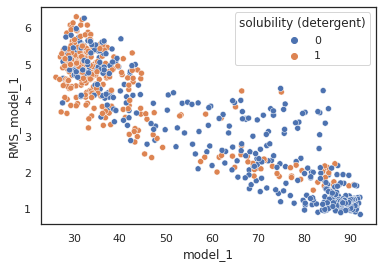

In [ ]:
sns.scatterplot(data=df_AF3, x="model_1", y="RMS_model_1", hue="solubility (detergent)")
sns.scatterplot(data=df_AF3, x="model_2", y="RMS_model_2", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_3", y="RMS_model_3", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_4", y="RMS_model_4", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_5", y="RMS_model_5", hue="solubility (detergent)",legend = False)

In [ ]:
df_AF3_b = df_AF3.loc[~(df_AF3.index.str.endswith("b"))]
df_AF3_b

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB0.1,90.539919,89.542500,88.298871,84.405161,83.278871,1.03,1.14,1.28,1.34,3.05,168.82,63.709677,0,0,0,0
TMB0.2,91.536371,90.816048,90.791855,90.073387,89.564839,1.18,1.11,1.26,1.26,1.18,228.94,63.709677,0,0,0,0
TMB0.3,92.009355,90.746694,84.785726,69.770081,64.430565,1.32,1.28,1.55,3.46,3.99,39.31,62.096774,0,0,0,0
TMB0.4,90.252581,88.739758,87.791613,87.122984,80.013306,1.18,1.25,1.16,1.10,1.98,190.92,62.903226,0,0,0,0
TMB0.5,91.312823,90.850081,87.832016,87.153226,82.898952,1.64,1.66,1.72,1.63,3.69,212.34,62.903226,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2.86,38.060484,32.389758,32.242016,32.000403,30.631371,4.27,5.28,4.97,5.20,5.03,1342.79,33.870968,1,1,0,0
TMB2.87,44.526290,42.007097,33.372177,31.511935,29.290000,4.60,3.86,4.66,5.49,4.99,1215.45,45.967742,1,1,0,0
TMB2.88,84.501694,42.669919,37.288226,36.642661,35.034194,1.87,5.31,5.46,5.39,4.79,527.04,47.580645,1,1,0,0
TMB2.89,42.266694,39.719194,35.308468,32.399194,30.539274,4.80,4.93,4.92,4.73,4.79,521.48,43.548387,0,0,0,0


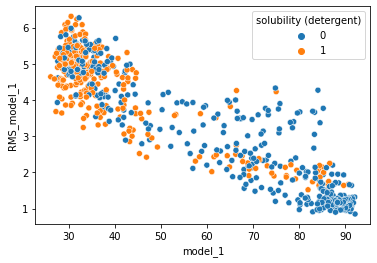

In [ ]:
sns.scatterplot(data=df_AF3, x="model_1", y="RMS_model_1", hue="solubility (detergent)")
sns.scatterplot(data=df_AF3, x="model_2", y="RMS_model_2", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_3", y="RMS_model_3", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_4", y="RMS_model_4", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3, x="model_5", y="RMS_model_5", hue="solubility (detergent)",legend = False)

In [ ]:
df_AF3_0 = df_AF3_b.loc[~(df_AF3_b.index.str.startswith("TMB2"))]
df_AF3_2 = df_AF3_b.loc[df_AF3_b.index.str.startswith("TMB2")]

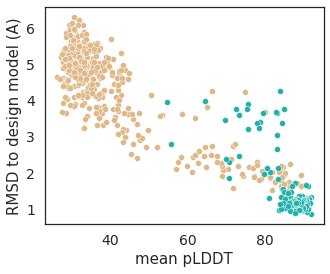

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")

ax = sns.scatterplot(data=df_AF3_2, x="model_1", y="RMS_model_1",color="burlywood")
sns.scatterplot(data=df_AF3_2, x="model_2", y="RMS_model_2",color="burlywood",ax=ax)
sns.scatterplot(data=df_AF3_2, x="model_3", y="RMS_model_3",color="burlywood",ax=ax)
sns.scatterplot(data=df_AF3_2, x="model_4", y="RMS_model_4",color="burlywood",ax=ax)
sns.scatterplot(data=df_AF3_2, x="model_5", y="RMS_model_5",color="burlywood",ax=ax)
sns.scatterplot(data=df_AF3_0, x="model_1", y="RMS_model_1",color="lightseagreen",ax=ax)
sns.scatterplot(data=df_AF3_0, x="model_2", y="RMS_model_2",color="lightseagreen",ax=ax)
sns.scatterplot(data=df_AF3_0, x="model_3", y="RMS_model_3",color="lightseagreen",ax=ax)
sns.scatterplot(data=df_AF3_0, x="model_4", y="RMS_model_4",color="lightseagreen",ax=ax)
sns.scatterplot(data=df_AF3_0, x="model_5", y="RMS_model_5",color="lightseagreen",ax=ax)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
df_ESM_b = df_ESM.loc[~(df_ESM.index.str.endswith("b"))]
df_ESM_b
df_ESM_b.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_2DE_updated.csv")

In [ ]:
df_ESM_0 = df_ESM_b.loc[~(df_ESM_b.index.str.startswith("TMB2"))]
df_ESM_2 = df_ESM_b.loc[df_ESM_b.index.str.startswith("TMB2")]

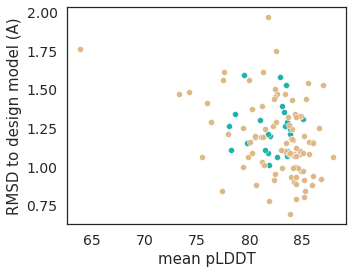

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
#cols=['burlywood','lightseagreen']

ax=sns.scatterplot(data=df_ESM_0, x="plDDT_backbone", y="RMS_ESM",color="lightseagreen")
sns.scatterplot(data=df_ESM_2, x="plDDT_backbone", y="RMS_ESM",color="burlywood",ax=ax)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

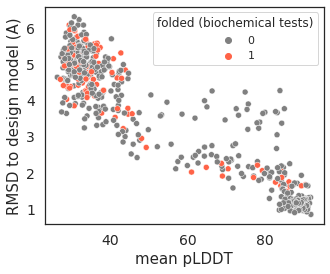

In [ ]:
#@title Most designs that are properly folded by AlphaFold with 3 recycles are designs with strong beta-sheet signature that did not express
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_AF3_b, x="model_1", y="RMS_model_1", hue="folded (biochemical tests)", palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_2", y="RMS_model_2", hue="folded (biochemical tests)",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_3", y="RMS_model_3", hue="folded (biochemical tests)",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_4", y="RMS_model_4", hue="folded (biochemical tests)",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_5", y="RMS_model_5", hue="folded (biochemical tests)",legend = False, ax=ax, palette=cols)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(25.0, 95.0)

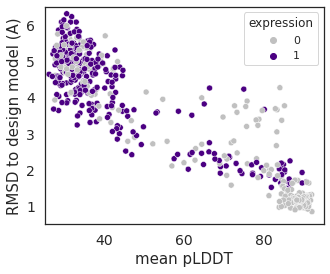

In [ ]:
#@title Most designs that are properly folded by AlphaFold with 3 recycles are designs with strong beta-sheet signature that did not express
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['silver','indigo']

ax=sns.scatterplot(data=df_AF3_b, x="model_1", y="RMS_model_1", hue="expression", palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_2", y="RMS_model_2", hue="expression",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_3", y="RMS_model_3", hue="expression",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_4", y="RMS_model_4", hue="expression",legend = False, ax=ax, palette=cols)
sns.scatterplot(data=df_AF3_b, x="model_5", y="RMS_model_5", hue="expression",legend = False, ax=ax, palette=cols)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 95)

(25.0, 95.0)

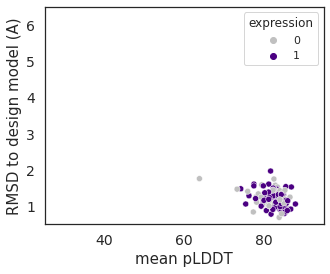

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['silver','indigo']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="RMS_ESM",palette=cols,hue="expression",)
#sns.scatterplot(data=df_ESM_2, x="plDDT_backbone", y="RMS_ESM",color="burlywood")

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 95)

(30.0, 95.0)

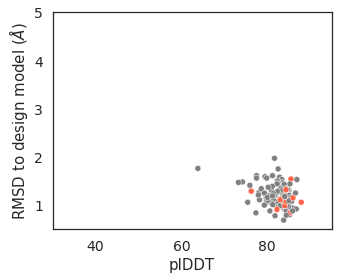

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="RMS_ESM",palette=cols,hue="folded (biochemical tests)",legend=None)
#sns.scatterplot(data=df_ESM_2, x="plDDT_backbone", y="RMS_ESM",color="burlywood")

ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 95)

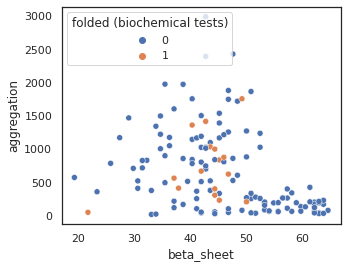

In [ ]:
sns.scatterplot(data=df_AF3, x="beta_sheet", y="aggregation", hue="folded (biochemical tests)")

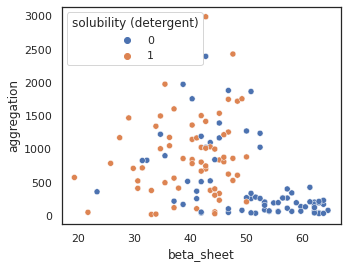

In [ ]:
sns.scatterplot(data=df_AF3, x="beta_sheet", y="aggregation", hue="solubility (detergent)")

In [ ]:
dAF3b = dAF3.loc[~(dAF3.index.str.endswith('b'))]
dAFrms3b = dAFrms3.loc[~(dAFrms3.index.str.endswith('b'))]
dAF3_stack=dAF3b.stack()
dAFrms3b = dAFrms3b.rename(columns={"RMS_model_1": "model_1", "RMS_model_2": "model_2", "RMS_model_3": "model_3", "RMS_model_4": "model_4", "RMS_model_5": "model_5"})
dAFrms3_stack= dAFrms3b.stack()

dAF3_only = pd.concat([dAF3_stack, dAFrms3_stack], axis=1)
dAF3_only = dAF3_only.rename(columns={0:'plDDT',1:"RMSD"}, index={0:'design',1:'model'})
dAF3_only.index.names = ['design','model']
dresults.index.names = ['design']

dAF3_F = dresults.join(dAF3_only, how="inner")
dAF3_F

expression  solubility (detergent)  \
design  model                                         
TMB0.1  model_1           0                       0   
        model_2           0                       0   
        model_3           0                       0   
        model_4           0                       0   
        model_5           0                       0   
...                     ...                     ...   
TMB2.90 model_1           0                       0   
        model_2           0                       0   
        model_3           0                       0   
        model_4           0                       0   
        model_5           0                       0   

                 folded (biochemical tests)  NMR      plDDT  RMSD  
design  model                                                      
TMB0.1  model_1                           0    0  90.539919  1.03  
        model_2                           0    0  89.542500  1.14  
        model_3                           0    0  88.298871  1.28  
        model_4                           0    0  84.405161  1.34  
        model_5                           0    0  83.278871  3.05  
...                                     ...  ...        ...   ...  
TMB2.90 model_1                           0    0  87.512823  1.67  
        model_2                           0    0  71.824194  1.58  
        model_3                           0    0  35.868145  4.85  
        model_4                           0    0  35.108548  4.44  
        model_5                           0    0  33.212581  4.76  

[575 rows x 6 columns]

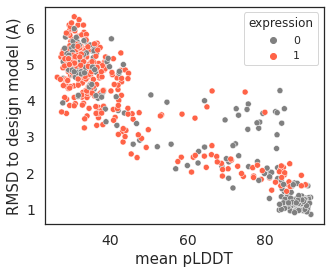

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF3_F, x="plDDT", y="RMSD", hue="expression", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(30.0, 102.0)

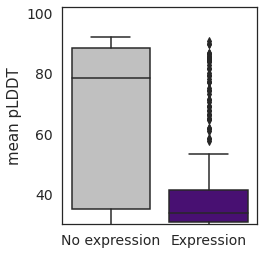

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['silver', 'indigo']

plotting_parameters = {
    'data':    dAF3_F,
    'x':       'expression',
    'y':       'plDDT',
    'palette': cols,
}

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression', 'Expression'])
plt.ylim(30, 102)

In [ ]:
pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import mannwhitneyu, normaltest, brunnermunzel
from sklearn.model_selection import permutation_test_score

In [ ]:
p_non_folded = dAF3_F.loc[(dAF3_F['folded (biochemical tests)'] == 0), "plDDT"].values
p_folded = dAF3_F.loc[(dAF3_F['folded (biochemical tests)'] == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  0.0
p_folded:  1.6987186828183303e-08

Log(p_non_folded):  0.0
Log(p_folded):  2.033782817524723e-06


In [ ]:
r_non_folded = dAF3_F.loc[(dAF3_F['folded (biochemical tests)'] == 0), "RMSD"].values
r_folded = dAF3_F.loc[(dAF3_F['folded (biochemical tests)'] == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)

r_non_folded:  1.268412926482658e-153
r_folded:  0.0005447993538753227

Log(r_non_folded):  3.474296671107543e-18
Log(r_folded):  1.064412487208542e-06


In [ ]:
stat_results_AF3_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF3_plDDT = [result.pvalue for result in stat_results_AF3_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF3_plDDT[0])

stat_results_AF3_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF3_RMS = [result.pvalue for result in stat_results_AF3_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF3_RMS[0])

stat_results_AF3_plDDT_BM = [brunnermunzel(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF3_plDDT_BM = [result.pvalue for result in stat_results_AF3_plDDT_BM]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF3_plDDT_BM[0])

stat_results_AF3_RMS_BM = [brunnermunzel(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF3_RMS_BM = [result.pvalue for result in stat_results_AF3_RMS_BM]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF3_RMS_BM[0])

stat_results_AF3_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF3_plDDT_perm[0]:.4f}")

stat_results_AF3_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF3_RMS_perm[0]:.4f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=24491.0, pvalue=0.0006686277819907468)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=15839.0, pvalue=0.004070140566659984)
non folded vs folded AlphaFold plDDT: BrunnerMunzelResult(statistic=-3.94473930712284, pvalue=0.00012924852284729928)
non folded vs folded RMSD AlphaFold prediction to design model: BrunnerMunzelResult(statistic=3.377224386658473, pvalue=0.0009487471901334921)
Permutation test: p-value=0.0001
Permutation test: p-value=0.0004


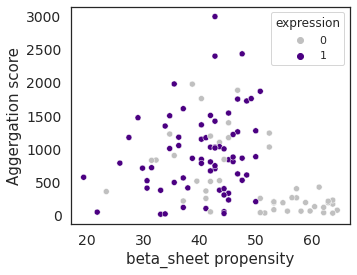

In [ ]:
#@title These sequences are out of the biological TMB space. Now we try to filter them out to see if the data improve
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['silver','indigo']

ax=sns.scatterplot(data=df_AF3_b, x="beta_sheet", y="aggregation", hue="expression", palette=cols)
ax.set_xlabel("beta_sheet propensity",fontsize=15)
ax.set_ylabel("Aggergation score",fontsize=15)
ax.tick_params(labelsize=14)

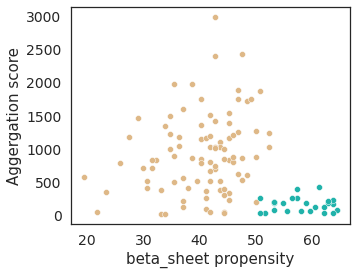

In [ ]:
#@title These sequences are out of the biological TMB space. Now we try to filter them out to see if the data improve
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
#cols=['silver','indigo']

ax=sns.scatterplot(data=df_AF3_2, x="beta_sheet", y="aggregation", color='burlywood')
sns.scatterplot(data=df_AF3_0, x="beta_sheet", y="aggregation", color='lightseagreen',ax=ax)
ax.set_xlabel("beta_sheet propensity",fontsize=15)
ax.set_ylabel("Aggergation score",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
df_AF3_filtered = df_AF3_b.loc[(df_AF3_b["beta_sheet"]<51) & (df_AF3_b["aggregation"]<1750) ]
df_AF3_filtered

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB1.2,91.326452,91.045403,87.904516,70.692177,55.739597,1.06,1.14,1.19,1.85,2.79,40.55,50.806452,0,0,0,0
TMB1.13,86.802177,81.292903,73.314435,70.744839,70.106210,1.30,1.29,2.47,2.30,2.39,254.85,50.806452,0,0,0,0
TMB2.1,32.965484,31.005968,29.245887,28.556935,27.104194,3.92,4.89,5.01,4.57,5.20,55.33,44.354839,1,1,0,0
TMB2.2,66.354597,34.549194,34.404677,30.825887,29.044274,2.75,4.88,3.78,3.91,4.79,572.42,19.354839,1,1,0,0
TMB2.3,44.498548,36.359597,31.847742,31.474919,29.433548,3.78,4.44,4.54,5.77,5.15,230.78,45.161290,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2.85,86.699194,37.669919,34.427419,29.054516,28.031774,1.62,3.65,4.72,5.15,4.95,668.11,41.935484,1,1,1,1
TMB2.86,38.060484,32.389758,32.242016,32.000403,30.631371,4.27,5.28,4.97,5.20,5.03,1342.79,33.870968,1,1,0,0
TMB2.87,44.526290,42.007097,33.372177,31.511935,29.290000,4.60,3.86,4.66,5.49,4.99,1215.45,45.967742,1,1,0,0
TMB2.88,84.501694,42.669919,37.288226,36.642661,35.034194,1.87,5.31,5.46,5.39,4.79,527.04,47.580645,1,1,0,0


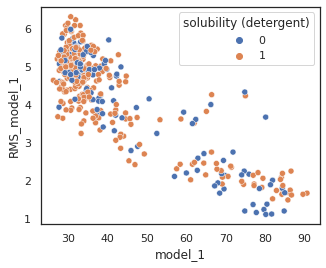

In [ ]:
sns.scatterplot(data=df_AF3_filtered, x="model_1", y="RMS_model_1", hue="solubility (detergent)")
sns.scatterplot(data=df_AF3_filtered, x="model_2", y="RMS_model_2", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_3", y="RMS_model_3", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_4", y="RMS_model_4", hue="solubility (detergent)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_5", y="RMS_model_5", hue="solubility (detergent)",legend = False)

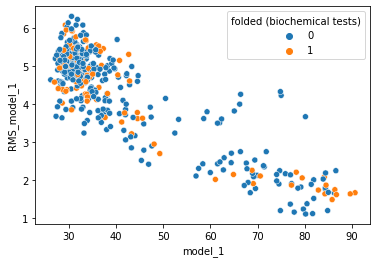

In [ ]:
sns.scatterplot(data=df_AF3_filtered, x="model_1", y="RMS_model_1", hue="folded (biochemical tests)")
sns.scatterplot(data=df_AF3_filtered, x="model_2", y="RMS_model_2", hue="folded (biochemical tests)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_3", y="RMS_model_3", hue="folded (biochemical tests)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_4", y="RMS_model_4", hue="folded (biochemical tests)",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_5", y="RMS_model_5", hue="folded (biochemical tests)",legend = False)

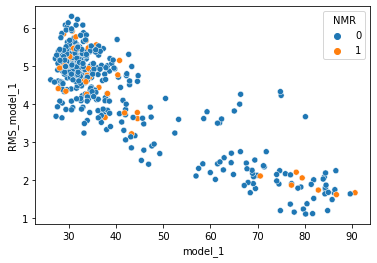

In [ ]:
sns.scatterplot(data=df_AF3_filtered, x="model_1", y="RMS_model_1", hue="NMR")
sns.scatterplot(data=df_AF3_filtered, x="model_2", y="RMS_model_2", hue="NMR",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_3", y="RMS_model_3", hue="NMR",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_4", y="RMS_model_4", hue="NMR",legend = False)
sns.scatterplot(data=df_AF3_filtered, x="model_5", y="RMS_model_5", hue="NMR",legend = False)

In [ ]:
dAF32 = dAF3.loc[dAF3.index.str.startswith('TMB2')]
dAFrms32 = dAFrms3.loc[dAFrms3.index.str.startswith('TMB2')]
dAF3_stack=dAF32.stack()
dAFrms32 = dAFrms32.rename(columns={"RMS_model_1": "model_1", "RMS_model_2": "model_2", "RMS_model_3": "model_3", "RMS_model_4": "model_4", "RMS_model_5": "model_5"})
dAFrms3_stack= dAFrms32.stack()

dAF3_only = pd.concat([dAF3_stack, dAFrms3_stack], axis=1)
dAF3_only = dAF3_only.rename(columns={0:'plDDT',1:"RMSD"}, index={0:'design',1:'model'})
dAF3_only.index.names = ['design','model']
dresults.index.names = ['design']
dprop.index.names = ['design']

dAF3_F2 = dresults.join(dAF3_only, how="inner")
dAF3_F2 = dprop.join(dAF3_F2, how="inner")
dAF3_Filt2 = dAF3_F2.loc[(dAF3_F2["beta_sheet"]<51) & (dAF3_F2["aggregation"]<1760) ]
dAF3_Filt2

aggregation  beta_sheet  expression  solubility (detergent)  \
design  model                                                                  
TMB2.1  model_1        55.33   44.354839           1                       1   
        model_2        55.33   44.354839           1                       1   
        model_3        55.33   44.354839           1                       1   
        model_4        55.33   44.354839           1                       1   
        model_5        55.33   44.354839           1                       1   
...                      ...         ...         ...                     ...   
TMB2.89 model_1       521.48   43.548387           0                       0   
        model_2       521.48   43.548387           0                       0   
        model_3       521.48   43.548387           0                       0   
        model_4       521.48   43.548387           0                       0   
        model_5       521.48   43.548387           0                       0   

                 folded (biochemical tests)  NMR      plDDT  RMSD  
design  model                                                      
TMB2.1  model_1                           0    0  32.965484  3.92  
        model_2                           0    0  31.005968  4.89  
        model_3                           0    0  29.245887  5.01  
        model_4                           0    0  28.556935  4.57  
        model_5                           0    0  27.104194  5.20  
...                                     ...  ...        ...   ...  
TMB2.89 model_1                           0    0  42.266694  4.80  
        model_2                           0    0  39.719194  4.93  
        model_3                           0    0  35.308468  4.92  
        model_4                           0    0  32.399194  4.73  
        model_5                           0    0  30.539274  4.79  

[405 rows x 8 columns]

In [ ]:
p_non_folded = dAF3_Filt2.loc[(dAF3_Filt2['folded (biochemical tests)'] == 0), "plDDT"].values
p_folded = dAF3_Filt2.loc[(dAF3_Filt2['folded (biochemical tests)'] == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  1.0782147046412184e-25
p_folded:  1.6987186828183303e-08

Log(p_non_folded):  1.607158224681296e-17
Log(p_folded):  2.033782817524723e-06


In [ ]:
r_non_folded = dAF3_Filt2.loc[(dAF3_Filt2['folded (biochemical tests)'] == 0), "RMSD"].values
r_folded = dAF3_Filt2.loc[(dAF3_Filt2['folded (biochemical tests)'] == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)

r_non_folded:  3.6862671655813947e-09
r_folded:  0.0005447993538753227

Log(r_non_folded):  9.879718771369223e-18
Log(r_folded):  1.064412487208542e-06


In [ ]:
stat_results_AF3_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF3_plDDT = [result.pvalue for result in stat_results_AF3_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF3_plDDT[0])

stat_results_AF3_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF3_RMS = [result.pvalue for result in stat_results_AF3_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF3_RMS[0])

stat_results_AF3_plDDT_BM = [brunnermunzel(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF3_plDDT_BM = [result.pvalue for result in stat_results_AF3_plDDT_BM]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF3_plDDT_BM[0])

stat_results_AF3_RMS_BM = [brunnermunzel(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF3_RMS_BM = [result.pvalue for result in stat_results_AF3_RMS_BM]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF3_RMS_BM[0])

stat_results_AF3_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF3_plDDT_perm[0]:.4f}")

stat_results_AF3_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF3_RMS_perm[0]:.4f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=12528.0, pvalue=0.6151640227578503)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=13918.5, pvalue=0.3276813342225743)
non folded vs folded AlphaFold plDDT: BrunnerMunzelResult(statistic=0.5035717553111348, pvalue=0.6154693673520804)
non folded vs folded RMSD AlphaFold prediction to design model: BrunnerMunzelResult(statistic=-0.9861780631729336, pvalue=0.3259607733448199)
Permutation test: p-value=0.5877
Permutation test: p-value=0.5121


In [ ]:
df_AF48_filt =  df_AF48.loc[(df_AF48["beta_sheet"]<51) & (df_AF48["aggregation"]<1760) ]
df_AF48_filt

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB2.1,46.949194,38.321371,31.246129,29.921694,29.797661,3.44,5.21,4.18,5.75,4.87,55.33,44.354839,1,1,0,0
TMB2.2,87.167097,71.709919,66.704919,47.671855,36.089516,3.79,2.87,2.79,4.17,4.11,572.42,19.354839,1,1,0,0
TMB2.3,91.012661,73.752419,48.202500,46.991935,34.887581,1.85,4.12,3.83,2.82,4.23,230.78,45.161290,1,1,1,1
TMB2.4,85.782984,75.363065,33.709194,31.991210,30.299839,1.80,1.86,5.62,4.74,5.34,1170.79,27.419355,1,1,0,0
TMB2.5,85.301935,82.266532,39.722984,37.584435,31.658145,1.48,2.38,5.28,4.72,5.06,1049.29,36.290323,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMB2.85,87.987016,86.455887,84.619032,60.121855,43.554355,1.64,1.71,3.91,2.68,3.27,668.11,41.935484,1,1,1,1
TMB2.86,66.170484,45.617097,38.004516,35.664113,32.253710,2.33,5.21,4.84,5.12,4.26,1342.79,33.870968,1,1,0,0
TMB2.87,69.566129,46.491613,35.036613,33.040726,30.126371,5.34,4.83,4.83,4.75,4.76,1215.45,45.967742,1,1,0,0
TMB2.88,84.483306,46.534194,40.551048,38.025161,35.059839,1.89,5.04,5.20,5.27,5.21,527.04,47.580645,1,1,0,0


(25.0, 100.0)

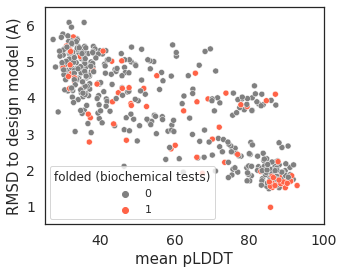

In [ ]:
#@title With 48 recycles and without the high beta-sheet designs, AF2 discrimination looks better
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_AF48, x="model_1", y="RMS_model_1", hue="folded (biochemical tests)", palette=cols)
sns.scatterplot(data=df_AF48, x="model_2", y="RMS_model_2", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48, x="model_3", y="RMS_model_3", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48, x="model_4", y="RMS_model_4", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48, x="model_5", y="RMS_model_5", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 100)

(25.0, 100.0)

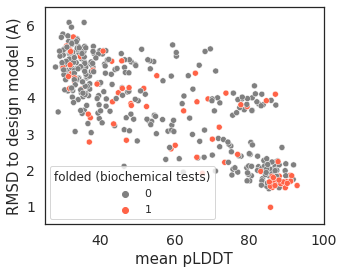

In [ ]:
#@title With 48 recycles and without the high beta-sheet designs, AF2 discrimination looks better
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_AF48_filt, x="model_1", y="RMS_model_1", hue="folded (biochemical tests)", palette=cols)
sns.scatterplot(data=df_AF48_filt, x="model_2", y="RMS_model_2", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_3", y="RMS_model_3", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_4", y="RMS_model_4", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_5", y="RMS_model_5", hue="folded (biochemical tests)",legend = False, palette=cols, ax=ax)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 100)

(25.0, 100.0)

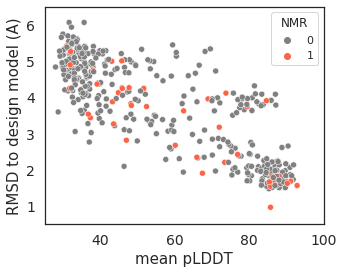

In [ ]:
#@title With 48 recycles and without the high beta-sheet designs, AF2 discrimination looks better
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_AF48, x="model_1", y="RMS_model_1", hue="NMR", palette=cols)
sns.scatterplot(data=df_AF48_filt, x="model_2", y="RMS_model_2", hue="NMR",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_3", y="RMS_model_3", hue="NMR",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_4", y="RMS_model_4", hue="NMR",legend = False, palette=cols, ax=ax)
sns.scatterplot(data=df_AF48_filt, x="model_5", y="RMS_model_5", hue="NMR",legend = False, palette=cols, ax=ax)

ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 100)

In [ ]:
dAF48_stack=dAF48.stack()
dAFrms48 = dAFrms48.rename(columns={"RMS_model_1": "model_1", "RMS_model_2": "model_2", "RMS_model_3": "model_3", "RMS_model_4": "model_4", "RMS_model_5": "model_5"})
dAFrms48_stack= dAFrms48.stack()

dAF48_only = pd.concat([dAF48_stack, dAFrms48_stack], axis=1)
dAF48_only = dAF48_only.rename(columns={0:'plDDT',1:"RMSD"}, index={0:'design',1:'model'})
dAF48_only.index.names = ['design','model']
dresults.index.names = ['design']
dprop.index.names = ['design']

dAF48_F = dresults.join(dAF48_only, how="inner")
dAF48_F = dAF48_F.join(dprop, how='inner')
dAF48_Filt =  dAF48_F.loc[(dAF48_F["beta_sheet"]<51) & (dAF48_F["aggregation"]<1760) ]
dAF48_Filt

expression  solubility (detergent)  \
design  model                                         
TMB2.1  model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
        model_4           1                       1   
        model_5           1                       1   
...                     ...                     ...   
TMB2.89 model_1           0                       0   
        model_2           0                       0   
        model_3           0                       0   
        model_4           0                       0   
        model_5           0                       0   

                 folded (biochemical tests)  NMR      plDDT  RMSD  \
design  model                                                       
TMB2.1  model_1                           0    0  46.949194  3.44   
        model_2                           0    0  38.321371  5.21   
        model_3                           0    0  31.246129  4.18   
        model_4                           0    0  29.921694  5.75   
        model_5                           0    0  29.797661  4.87   
...                                     ...  ...        ...   ...   
TMB2.89 model_1                           0    0  53.420161  4.79   
        model_2                           0    0  53.336452  5.01   
        model_3                           0    0  46.405968  3.11   
        model_4                           0    0  37.928306  4.94   
        model_5                           0    0  36.656935  3.28   

                 aggregation  beta_sheet  
design  model                             
TMB2.1  model_1        55.33   44.354839  
        model_2        55.33   44.354839  
        model_3        55.33   44.354839  
        model_4        55.33   44.354839  
        model_5        55.33   44.354839  
...                      ...         ...  
TMB2.89 model_1       521.48   43.548387  
        model_2       521.48   43.548387  
        model_3       521.48   43.548387  
        model_4       521.48   43.548387  
        model_5       521.48   43.548387  

[405 rows x 8 columns]

(22.0, 95.0)

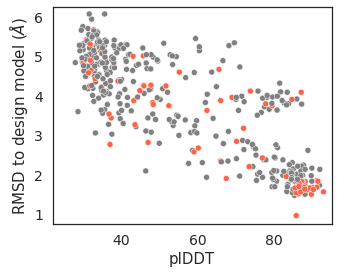

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_Filt, x="plDDT", y="RMSD", hue="folded (biochemical tests)", palette=cols, legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.75, 6.25)
plt.xlim(22, 95)

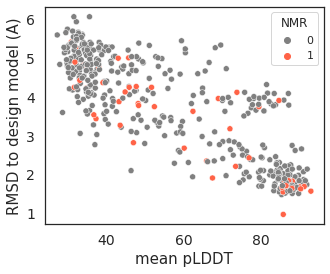

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_F, x="plDDT", y="RMSD", hue="NMR", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

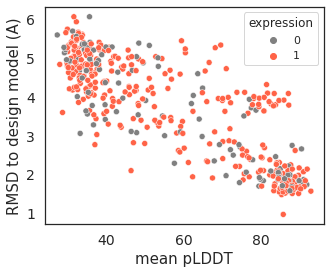

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_F, x="plDDT", y="RMSD", hue="expression", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import mannwhitneyu, normaltest, brunnermunzel
from sklearn.model_selection import permutation_test_score

In [ ]:
p_non_folded = dAF48_F.loc[(dAF48_F['folded (biochemical tests)'] == 0), "plDDT"].values
p_folded = dAF48_F.loc[(dAF48_F['folded (biochemical tests)'] == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  0.0
p_folded:  2.2346604212378474e-78

Log(p_non_folded):  0.0
Log(p_folded):  1.5556228225723992e-15


In [ ]:
r_non_folded = dAF48_F.loc[(dAF48_F['folded (biochemical tests)'] == 0), "RMSD"].values
r_folded = dAF48_F.loc[(dAF48_F['folded (biochemical tests)'] == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)

r_non_folded:  2.1048938902478115e-91
r_folded:  1.4854084540010462e-21

Log(r_non_folded):  2.3413566330792206e-21
Log(r_folded):  1.7450953819207412e-16


In [ ]:
stat_results_AF48_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_plDDT = [result.pvalue for result in stat_results_AF48_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF48_plDDT[0])

stat_results_AF48_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_RMS = [result.pvalue for result in stat_results_AF48_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF48_RMS[0])

stat_results_AF48_plDDT_BM = [brunnermunzel(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_plDDT_BM = [result.pvalue for result in stat_results_AF48_plDDT_BM]
print("non folded vs folded ESMFold plDDT unequal variance:", stat_results_AF48_plDDT_BM[0])

stat_results_AF48_RMS_BM = [brunnermunzel(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_RMS_BM = [result.pvalue for result in stat_results_AF48_RMS_BM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_AF48_RMS_BM[0])

stat_results_AF48_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_plDDT_perm[0]:.4f}")

stat_results_AF48_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_RMS_perm[0]:.4f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=11310.0, pvalue=0.0009382638125392546)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=19038.0, pvalue=5.878264198207023e-05)
non folded vs folded ESMFold plDDT unequal variance: BrunnerMunzelResult(statistic=3.198458459551474, pvalue=0.0018380955844377045)
non folded vs folded RMSD ESMFold prediction to design model: BrunnerMunzelResult(statistic=-4.057277297640599, pvalue=9.48967919038875e-05)
Permutation test: p-value=0.0020
Permutation test: p-value=0.0000


In [ ]:
p_non_folded = dAF48_Filt.loc[(dAF48_Filt['folded (biochemical tests)'] == 0), "plDDT"].values
p_folded = dAF48_Filt.loc[(dAF48_Filt['folded (biochemical tests)'] == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  0.0
p_folded:  2.2346604212378474e-78

Log(p_non_folded):  0.0
Log(p_folded):  1.5556228225723992e-15


In [ ]:
r_non_folded = dAF48_Filt.loc[(dAF48_Filt['folded (biochemical tests)'] == 0), "RMSD"].values
r_folded = dAF48_Filt.loc[(dAF48_Filt['folded (biochemical tests)'] == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)

r_non_folded:  9.177588007212379e-37
r_folded:  1.4854084540010462e-21

Log(r_non_folded):  8.493873159808455e-12
Log(r_folded):  1.7450953819207412e-16


In [ ]:
stat_results_AF48_Filt_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_Filt_plDDT = [result.pvalue for result in stat_results_AF48_Filt_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF48_Filt_plDDT[0])

stat_results_AF48_Filt_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_Filt_RMS = [result.pvalue for result in stat_results_AF48_Filt_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF48_Filt_RMS[0])

stat_results_AF48_Filt_plDDT_BM = [brunnermunzel(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_Filt_plDDT_BM = [result.pvalue for result in stat_results_AF48_Filt_plDDT_BM]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF48_Filt_plDDT_BM[0])

stat_results_AF48_Filt_RMS_BM = [brunnermunzel(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_Filt_RMS_BM = [result.pvalue for result in stat_results_AF48_Filt_RMS_BM]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF48_Filt_RMS_BM[0])

stat_results_AF48_Filt_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_Filt_plDDT_perm[0]:.4f}")

stat_results_AF48_Filt_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_Filt_RMS_perm[0]:.4f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=9515.0, pvalue=0.00020304850795770546)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=16963.0, pvalue=2.390508455179436e-05)
non folded vs folded AlphaFold plDDT: BrunnerMunzelResult(statistic=3.603439948861281, pvalue=0.00048443289371080667)
non folded vs folded RMSD AlphaFold prediction to design model: BrunnerMunzelResult(statistic=-4.293138714390458, pvalue=3.822253504494555e-05)
Permutation test: p-value=0.0005
Permutation test: p-value=0.0000


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.030e-04


[Text(0, 0, 'No expression\nmisfolded'), Text(1, 0, 'Folded')]

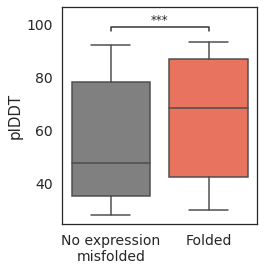

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_Filt,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_Filt_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_Filt_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("plDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.030e-04


[Text(0, 0, 'Not folded'), Text(1, 0, 'Folded')]

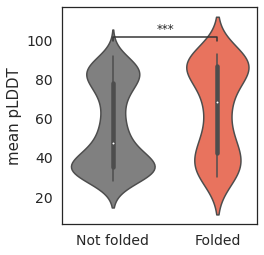

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_Filt,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_Filt_plDDT]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_Filt_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.391e-05


(0.5, 7.0)

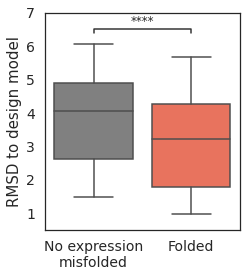

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_Filt,
    'x':       'folded (biochemical tests)',
    'y':       'RMSD',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_Filt_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_Filt_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(0.5, 7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.391e-05


[Text(0, 0, 'Not folded'), Text(1, 0, 'Folded')]

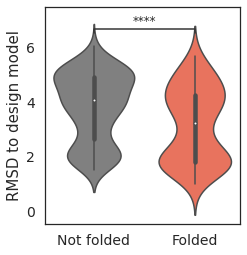

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_Filt,
    'x':       'folded (biochemical tests)',
    'y':       'RMSD',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_Filt_RMS]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_Filt_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

[Text(0, 0, 'Not folded'), Text(0, 0, 'Folded')]

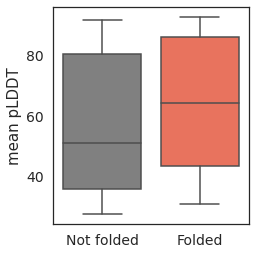

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_F,
    'x':       'NMR',
    'y':       'plDDT',
    'palette': cols,
}

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

In [ ]:
dmean_AF48 = dAF48_Filt.groupby(level=0).mean()
dbest_p_AF48 = dAF48_Filt.sort_values("plDDT").groupby(level=0).nth(4)
dbest_r_AF48 = dAF48_Filt.sort_values("RMSD").groupby(level=0).nth(0)
dbest_r_AF48

,expression,solubility (detergent),folded (biochemical tests),NMR,plDDT,RMSD,aggregation,beta_sheet
design,,,,,,,,
TMB2.1,1,1,0,0,46.949194,3.44,55.33,44.354839
TMB2.12,1,1,0,0,35.650403,3.65,494.25,35.483871
TMB2.14,0,0,0,0,70.942581,1.97,1097.65,43.548387
TMB2.15,1,1,0,0,28.654194,3.60,1255.72,46.774194
TMB2.17,1,1,1,1,92.884677,1.57,835.79,45.161290
...,...,...,...,...,...,...,...,...
TMB2.86,1,1,0,0,66.170484,2.33,1342.79,33.870968
TMB2.87,1,1,0,0,33.040726,4.75,1215.45,45.967742
TMB2.88,1,1,0,0,84.483306,1.89,527.04,47.580645


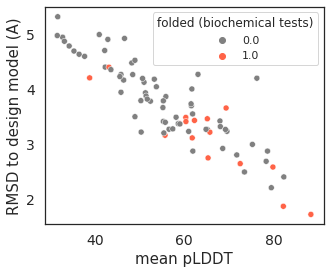

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dmean_AF48, x="plDDT", y="RMSD", hue="folded (biochemical tests)",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)


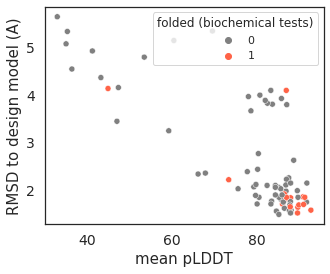

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dbest_p_AF48, x="plDDT", y="RMSD", hue="folded (biochemical tests)",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(25.0, 100.0)

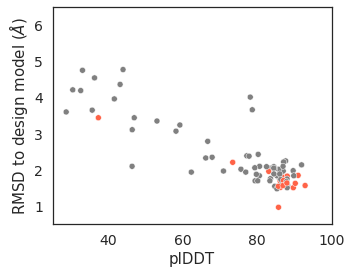

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dbest_r_AF48, x="plDDT", y="RMSD", hue="folded (biochemical tests)",palette=cols, legend=None)
#ax.set_xlabel("mean pLDDT",fontsize=15)
#ax.set_ylabel("RMSD to design model (A)",fontsize=15)
#ax.tick_params(labelsize=14)

ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.5)
plt.xlim(25, 100)

In [ ]:
dbest_p_AF48.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/AF48_best_plddt.pkl")
dbest_r_AF48.to_pickle("/content/google_drive/My Drive/AF_vs_ESMF/ESMFold_masking/AF48_best_rmsd.pkl")

In [ ]:
dAF48_picked=dAF48_Filt.loc[(dAF48_Filt["RMSD"] < 1.9)&(dAF48_Filt["plDDT"] > 85.0)]
dAF48_picked

expression  solubility (detergent)  \
design  model                                         
TMB2.3  model_1           1                       1   
TMB2.4  model_1           1                       1   
TMB2.5  model_1           1                       1   
TMB2.6  model_1           0                       0   
TMB2.17 model_1           1                       1   
        model_2           1                       1   
TMB2.19 model_1           1                       1   
TMB2.22 model_2           1                       1   
TMB2.25 model_1           1                       1   
TMB2.27 model_1           1                       1   
TMB2.28 model_1           1                       1   
TMB2.29 model_1           1                       1   
        model_2           1                       1   
TMB2.31 model_1           1                       1   
        model_3           1                       1   
TMB2.35 model_2           1                       1   
TMB2.41 model_1           1                       1   
TMB2.43 model_1           1                       1   
        model_2           1                       1   
TMB2.49 model_1           1                       1   
TMB2.50 model_1           1                       1   
TMB2.56 model_1           1                       1   
        model_2           1                       1   
TMB2.58 model_1           1                       1   
TMB2.59 model_1           0                       0   
        model_2           0                       0   
TMB2.62 model_1           0                       0   
TMB2.65 model_1           0                       0   
TMB2.70 model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
TMB2.71 model_1           1                       1   
        model_2           1                       1   
TMB2.76 model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
        model_4           1                       1   
        model_5           1                       1   
TMB2.82 model_1           0                       0   
TMB2.83 model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
TMB2.84 model_1           0                       0   
TMB2.85 model_1           1                       1   
        model_2           1                       1   

                 folded (biochemical tests)  NMR      plDDT  RMSD  \
design  model                                                       
TMB2.3  model_1                           1    1  91.012661  1.85   
TMB2.4  model_1                           0    0  85.782984  1.80   
TMB2.5  model_1                           0    0  85.301935  1.48   
TMB2.6  model_1                           0    0  88.029113  1.75   
TMB2.17 model_1                           1    1  92.884677  1.57   
        model_2                           1    1  91.158145  1.69   
TMB2.19 model_1                           0    0  86.816694  1.81   
TMB2.22 model_2                           0    0  86.664274  1.62   
TMB2.25 model_1                           0    0  86.409516  1.76   
TMB2.27 model_1                           1    0  86.152823  1.70   
TMB2.28 model_1                           0    0  86.602661  1.61   
TMB2.29 model_1                           0    0  88.197823  1.57   
        model_2                           0    0  87.835081  1.67   
TMB2.31 model_1                           1    0  89.788387  1.63   
        model_3                           1    0  86.261452  1.52   
TMB2.35 model_2                           1    1  85.733089  0.97   
TMB2.41 model_1                           0    0  87.802500  1.56   
TMB2.43 model_1                           1    0  87.134194  1.81   
        model_2                           1    0  8

In [ ]:
dbest_r_AF48_picked=dbest_r_AF48.loc[(dbest_r_AF48["RMSD"] <= 1.85)&(dbest_r_AF48["plDDT"] > 85.0)]
dbest_r_AF48_picked

,expression,solubility (detergent),folded (biochemical tests),NMR,plDDT,RMSD,aggregation,beta_sheet
design,,,,,,,,
TMB2.17,1,1,1,1,92.884677,1.57,835.79,45.161290
TMB2.19,1,1,0,0,86.816694,1.81,606.45,48.387097
TMB2.22,1,1,0,0,86.664274,1.62,102.40,41.129032
TMB2.25,1,1,0,0,86.409516,1.76,803.43,41.935484
TMB2.27,1,1,1,0,86.152823,1.70,306.07,44.354839
TMB2.28,1,1,0,0,86.602661,1.61,1145.00,40.322581
TMB2.29,1,1,0,0,88.197823,1.57,1502.36,41.935484
TMB2.3,1,1,1,1,91.012661,1.85,230.78,45.161290
TMB2.31,1,1,1,0,86.261452,1.52,876.32,45.967742


In [ ]:
dscore = dAF48_picked.groupby('design')['plDDT'].count()
#dscore=dscore.rename(columns={'plDDT':'counts'})
#dscore.columns=["counts"]
dscore = dAF48_picked.groupby('design').agg({'plDDT':'count'})
dscore=dscore.rename(columns={'plDDT':'counts'})
dscore

,counts
design,
TMB2.17,2
TMB2.19,1
TMB2.22,1
TMB2.25,1
TMB2.27,1
TMB2.28,1
TMB2.29,2
TMB2.3,1
TMB2.31,2


In [ ]:
dAF48_score = dAF48_Filt.join(dscore, how="outer")
dAF48_score=dAF48_score.fillna(0)
dAF48_score

expression  solubility (detergent)  \
design  model                                         
TMB2.1  model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
        model_4           1                       1   
        model_5           1                       1   
...                     ...                     ...   
TMB2.89 model_1           0                       0   
        model_2           0                       0   
        model_3           0                       0   
        model_4           0                       0   
        model_5           0                       0   

                 folded (biochemical tests)  NMR      plDDT  RMSD  \
design  model                                                       
TMB2.1  model_1                           0    0  46.949194  3.44   
        model_2                           0    0  38.321371  5.21   
        model_3                           0    0  31.246129  4.18   
        model_4                           0    0  29.921694  5.75   
        model_5                           0    0  29.797661  4.87   
...                                     ...  ...        ...   ...   
TMB2.89 model_1                           0    0  53.420161  4.79   
        model_2                           0    0  53.336452  5.01   
        model_3                           0    0  46.405968  3.11   
        model_4                           0    0  37.928306  4.94   
        model_5                           0    0  36.656935  3.28   

                 aggregation  beta_sheet  counts  
design  model                                     
TMB2.1  model_1        55.33   44.354839     0.0  
        model_2        55.33   44.354839     0.0  
        model_3        55.33   44.354839     0.0  
        model_4        55.33   44.354839     0.0  
        model_5        55.33   44.354839     0.0  
...                      ...         ...     ...  
TMB2.89 model_1       521.48   43.548387     0.0  
        model_2       521.48   43.548387     0.0  
        model_3       521.48   43.548387     0.0  
        model_4       521.48   43.548387     0.0  
        model_5       521.48   43.548387     0.0  

[405 rows x 9 columns]

[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

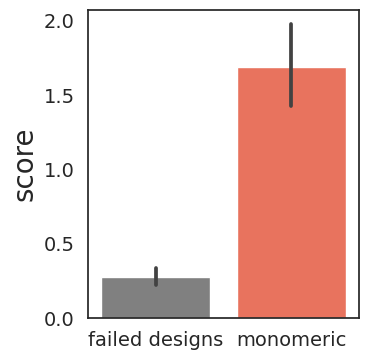

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']
ax=sns.barplot(data=dAF48_score, x='folded (biochemical tests)', y='counts', palette=cols)
ax.set_xlabel("")
ax.set_ylabel("score",fontsize=20)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])

[Text(0, 0, 'No expression\nmisfolded'), Text(1, 0, 'Folded')]

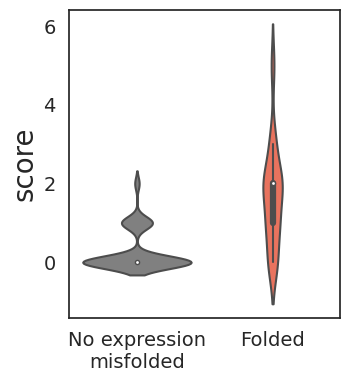

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']
ax=sns.violinplot(data=dAF48_score, x='folded (biochemical tests)', y='counts', palette=cols)
ax.set_xlabel("")
ax.set_ylabel("score",fontsize=20)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])

In [ ]:
dcount_AF48 = dAF48_score.sort_values("counts").groupby(level=0).nth(0)
dcount_AF48

,expression,solubility (detergent),folded (biochemical tests),NMR,plDDT,RMSD,aggregation,beta_sheet,counts
design,,,,,,,,,
TMB2.1,1,1,0,0,46.949194,3.44,55.33,44.354839,0.0
TMB2.12,1,1,0,0,30.003871,5.17,494.25,35.483871,0.0
TMB2.14,0,0,0,0,42.591290,3.62,1097.65,43.548387,0.0
TMB2.15,1,1,0,0,28.654194,3.60,1255.72,46.774194,0.0
TMB2.17,1,1,1,1,30.908387,5.42,835.79,45.161290,2.0
...,...,...,...,...,...,...,...,...,...
TMB2.86,1,1,0,0,66.170484,2.33,1342.79,33.870968,0.0
TMB2.87,1,1,0,0,30.126371,4.76,1215.45,45.967742,0.0
TMB2.88,1,1,0,0,35.059839,5.21,527.04,47.580645,0.0


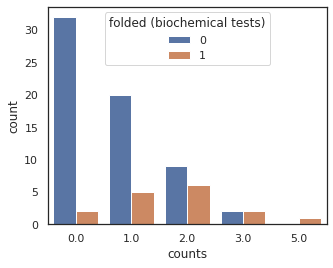

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
sns.countplot(data=dcount_AF48, x="counts", hue="folded (biochemical tests)")
#sns.barplot(data=dAF48_score, x="counts", y="RMSD", hue="folded (biochemical tests)")
#sns.scatterplot(data=dAF48_score, x="RMSD", y="counts", hue="folded (biochemical tests)",palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
df_AF48.loc[(df_AF48["folded (biochemical tests)"]==1) &(df_AF48["RMS_model_1"]>3)]

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB2.47,87.049435,83.120645,77.764677,65.960887,33.030242,4.09,1.96,3.80,3.88,4.54,400.84,44.354839,1,1,1,0
TMB2.73,44.835323,43.058629,37.310806,36.753468,31.855081,4.13,5.00,3.44,3.54,4.90,562.29,37.096774,1,1,1,1


(25.0, 100.0)

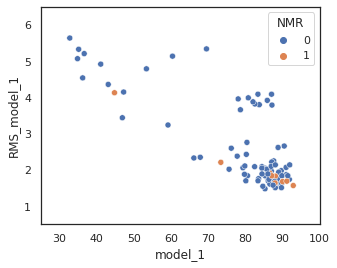

In [ ]:
sns.scatterplot(data=df_AF48, x="model_1", y="RMS_model_1", hue="NMR")
plt.ylim(0.5, 6.5)
plt.xlim(25, 100)

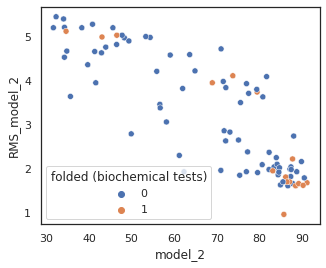

In [ ]:
sns.scatterplot(data=df_AF48, x="model_2", y="RMS_model_2", hue="folded (biochemical tests)")

In [ ]:
dAF48_filtered = dAF48_F.loc[(dAF48_F["beta_sheet"]<51) & (dAF48_F["aggregation"]<1760) ]
dAF48_filtered

expression  solubility (detergent)  \
design  model                                         
TMB2.1  model_1           1                       1   
        model_2           1                       1   
        model_3           1                       1   
        model_4           1                       1   
        model_5           1                       1   
...                     ...                     ...   
TMB2.89 model_1           0                       0   
        model_2           0                       0   
        model_3           0                       0   
        model_4           0                       0   
        model_5           0                       0   

                 folded (biochemical tests)  NMR      plDDT  RMSD  \
design  model                                                       
TMB2.1  model_1                           0    0  46.949194  3.44   
        model_2                           0    0  38.321371  5.21   
        model_3                           0    0  31.246129  4.18   
        model_4                           0    0  29.921694  5.75   
        model_5                           0    0  29.797661  4.87   
...                                     ...  ...        ...   ...   
TMB2.89 model_1                           0    0  53.420161  4.79   
        model_2                           0    0  53.336452  5.01   
        model_3                           0    0  46.405968  3.11   
        model_4                           0    0  37.928306  4.94   
        model_5                           0    0  36.656935  3.28   

                 aggregation  beta_sheet  
design  model                             
TMB2.1  model_1        55.33   44.354839  
        model_2        55.33   44.354839  
        model_3        55.33   44.354839  
        model_4        55.33   44.354839  
        model_5        55.33   44.354839  
...                      ...         ...  
TMB2.89 model_1       521.48   43.548387  
        model_2       521.48   43.548387  
        model_3       521.48   43.548387  
        model_4       521.48   43.548387  
        model_5       521.48   43.548387  

[405 rows x 8 columns]

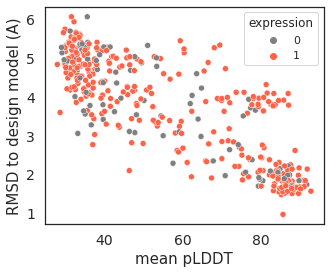

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_filtered, x="plDDT", y="RMSD", hue="expression", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(22.0, 95.0)

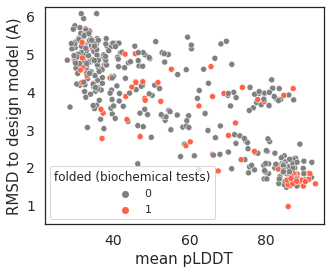

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_filtered, x="plDDT", y="RMSD", hue="folded (biochemical tests)", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.25)
plt.xlim(22, 95)

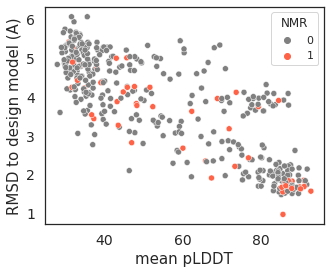

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF48_filtered, x="plDDT", y="RMSD", hue="NMR", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
p_non_folded = dAF48_filtered.loc[(dAF48_filtered['folded (biochemical tests)'] == 0), "plDDT"].values
p_folded = dAF48_filtered.loc[(dAF48_filtered['folded (biochemical tests)'] == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  0.0
p_folded:  2.2346604212378474e-78

Log(p_non_folded):  0.0
Log(p_folded):  1.5556228225723992e-15


In [ ]:
r_non_folded = dAF48_filtered.loc[(dAF48_filtered['folded (biochemical tests)'] == 0), "RMSD"].values
r_folded = dAF48_filtered.loc[(dAF48_filtered['folded (biochemical tests)'] == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)

r_non_folded:  9.177588007212379e-37
r_folded:  1.4854084540010462e-21

Log(r_non_folded):  8.493873159808455e-12
Log(r_folded):  1.7450953819207412e-16


In [ ]:
rr_best_non_folded = dbest_r_AF48.loc[(dbest_r_AF48['folded (biochemical tests)'] == 0), "RMSD"].values
rr_best_folded = dbest_r_AF48.loc[(dbest_r_AF48['folded (biochemical tests)'] == 1), "RMSD"].values

log_rr_best_non_folded = np.log(rr_best_non_folded)
log_rr_best_folded = np.log(rr_best_folded)

print("rr_best_non_folded: ", normaltest(rr_best_non_folded).pvalue)
print("rr_best_folded: ", normaltest(rr_best_folded).pvalue)
print()
print("Log(rr_best_non_folded): ", normaltest(log_rr_best_non_folded).pvalue)
print("Log(rr_best_folded): ", normaltest(log_rr_best_folded).pvalue)

rr_best_non_folded:  0.000606418539423789
rr_best_folded:  1.033227460381976e-05

Log(rr_best_non_folded):  0.012756854200884106
Log(rr_best_folded):  0.014947860469225088


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
rp_best_non_folded = dbest_r_AF48.loc[(dbest_r_AF48['folded (biochemical tests)'] == 0), "plDDT"].values
rp_best_folded = dbest_r_AF48.loc[(dbest_r_AF48['folded (biochemical tests)'] == 1), "plDDT"].values

log_rp_best_non_folded = np.log(rp_best_non_folded)
log_rp_best_folded = np.log(rp_best_folded)

print("rp_best_non_folded: ", normaltest(rp_best_non_folded).pvalue)
print("rp_best_folded: ", normaltest(rp_best_folded).pvalue)
print()
print("Log(rp_best_non_folded): ", normaltest(log_rp_best_non_folded).pvalue)
print("Log(rp_best_folded): ", normaltest(log_rp_best_folded).pvalue)

rp_best_non_folded:  0.0015616392937947109
rp_best_folded:  2.1156064805716247e-08

Log(rp_best_non_folded):  4.253433672386004e-05
Log(rp_best_folded):  3.6198517986221274e-09


In [ ]:
pr_best_non_folded = dbest_p_AF48.loc[(dbest_p_AF48['folded (biochemical tests)'] == 0), "RMSD"].values
pr_best_folded = dbest_p_AF48.loc[(dbest_p_AF48['folded (biochemical tests)'] == 1), "RMSD"].values

log_pr_best_non_folded = np.log(pr_best_non_folded)
log_pr_best_folded = np.log(pr_best_folded)

print("pr_best_non_folded: ", normaltest(pr_best_non_folded).pvalue)
print("pr_best_folded: ", normaltest(pr_best_folded).pvalue)
print()
print("Log(pr_best_non_folded): ", normaltest(log_pr_best_non_folded).pvalue)
print("Log(pr_best_folded): ", normaltest(log_pr_best_folded).pvalue)

pr_best_non_folded:  0.00753936789159355
pr_best_folded:  9.532863725740302e-05

Log(pr_best_non_folded):  0.0008836174387717165
Log(pr_best_folded):  0.0003623965131626878


In [ ]:
pp_best_non_folded = dbest_p_AF48.loc[(dbest_p_AF48['folded (biochemical tests)'] == 0), "plDDT"].values
pp_best_folded = dbest_p_AF48.loc[(dbest_p_AF48['folded (biochemical tests)'] == 1), "plDDT"].values

log_pp_best_non_folded = np.log(pp_best_non_folded)
log_pp_best_folded = np.log(pp_best_folded)

print("pp_best_non_folded: ", normaltest(pp_best_non_folded).pvalue)
print("pp_best_folded: ", normaltest(pp_best_folded).pvalue)
print()
print("Log(pp_best_non_folded): ", normaltest(log_pp_best_non_folded).pvalue)
print("Log(pp_best_folded): ", normaltest(log_pp_best_folded).pvalue)

pp_best_non_folded:  3.6820626513402603e-06
pp_best_folded:  5.969085751369231e-08

Log(pp_best_non_folded):  6.407486460616497e-08
Log(pp_best_folded):  1.0818446442555292e-08


In [ ]:
stat_results_AF48_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_plDDT = [result.pvalue for result in stat_results_AF48_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF48_plDDT[0])

stat_results_AF48_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_RMS = [result.pvalue for result in stat_results_AF48_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF48_RMS[0])

stat_results_AF48_plDDT_BM = [brunnermunzel(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF48_plDDT_BM = [result.pvalue for result in stat_results_AF48_plDDT_BM]
print("non folded vs folded ESMFold plDDT unequal variance:", stat_results_AF48_plDDT_BM[0])

stat_results_AF48_RMS_BM = [brunnermunzel(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF48_RMS_BM = [result.pvalue for result in stat_results_AF48_RMS_BM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_AF48_RMS_BM[0])

stat_results_AF48_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_plDDT_perm[0]:.10f}")

stat_results_AF48_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF48_RMS_perm[0]:.10f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=9515.0, pvalue=0.00020304850795770546)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=16963.0, pvalue=2.390508455179436e-05)
non folded vs folded ESMFold plDDT unequal variance: BrunnerMunzelResult(statistic=3.603439948861281, pvalue=0.00048443289371080667)
non folded vs folded RMSD ESMFold prediction to design model: BrunnerMunzelResult(statistic=-4.293138714390458, pvalue=3.822253504494555e-05)
Permutation test: p-value=0.0005000000
Permutation test: p-value=0.0000000000


In [ ]:
stat_results_p_best_plDDT = [mannwhitneyu(pp_best_non_folded, pp_best_folded, alternative="two-sided")]
pvalues_p_best_plDDT = [result.pvalue for result in stat_results_p_best_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_p_best_plDDT[0])

stat_results_p_best_RMS = [mannwhitneyu(pr_best_non_folded, pr_best_folded, alternative="two-sided")]
pvalues_p_best_RMS = [result.pvalue for result in stat_results_p_best_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_p_best_RMS[0])

stat_results_r_best_plDDT = [mannwhitneyu(rp_best_non_folded, rp_best_folded, alternative="two-sided")]
pvalues_r_best_plDDT = [result.pvalue for result in stat_results_r_best_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_r_best_plDDT[0])

stat_results_r_best_RMS = [mannwhitneyu(rr_best_non_folded, rr_best_folded, alternative="two-sided")]
pvalues_r_best_RMS = [result.pvalue for result in stat_results_r_best_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_r_best_RMS[0])

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=219.0, pvalue=0.0003644035093382227)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=747.0, pvalue=0.007201911624127911)
non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=261.0, pvalue=0.0021665956716636885)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=817.5, pvalue=0.0004254943815251462)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.030e-04


[Text(0, 0, 'Not folded'), Text(1, 0, 'Folded')]

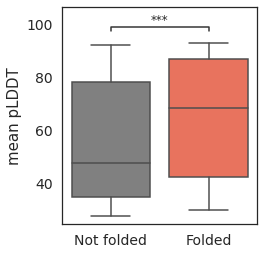

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.391e-05


[Text(0, 0, 'Not folded'), Text(1, 0, 'Folded')]

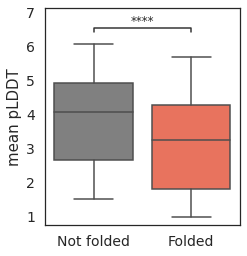

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'RMSD',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF48_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF48_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:5.000e-04


[Text(0, 0, 'Not folded'), Text(1, 0, 'Folded')]

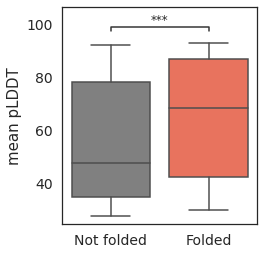

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF48_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in stat_results_AF48_plDDT_perm]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(stat_results_AF48_plDDT_perm)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['Not folded', 'Folded'])
#plt.ylim(30, 102)

In [ ]:
df_ESM_b

,plDDT_all,plDDT_backbone,ptm,RMS_ESM,aggregation,beta_sheet,expression,solubility (detergent),folded (biochemical tests),NMR
TMB0.1,77.866307,83.542454,0.793,1.10,168.82,63.709677,0,0,0,0
TMB0.2,77.844872,83.844478,0.800,1.21,228.94,63.709677,0,0,0,0
TMB0.3,79.369571,85.069237,0.823,1.31,39.31,62.096774,0,0,0,0
TMB0.4,77.874018,83.798754,0.810,1.24,190.92,62.903226,0,0,0,0
TMB0.5,77.240099,82.877326,0.788,1.58,212.34,62.903226,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
TMB2.86,75.698711,79.335719,0.779,1.00,1342.79,33.870968,1,1,0,0
TMB2.87,71.605820,75.460728,0.733,1.06,1215.45,45.967742,1,1,0,0
TMB2.88,73.236534,77.507636,0.761,1.56,527.04,47.580645,1,1,0,0
TMB2.89,76.991899,81.316749,0.802,1.01,521.48,43.548387,0,0,0,0


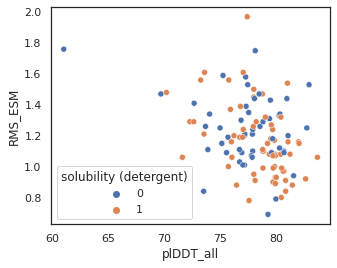

In [ ]:
sns.scatterplot(data=df_ESM_b, x="plDDT_all", y="RMS_ESM", hue="solubility (detergent)")

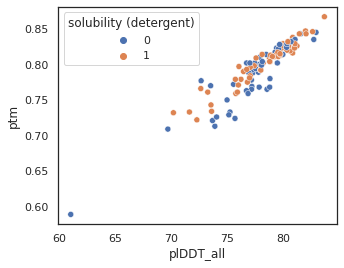

In [ ]:
sns.scatterplot(data=df_ESM_b, x="plDDT_all", y="ptm", hue="solubility (detergent)")

(30.0, 100.0)

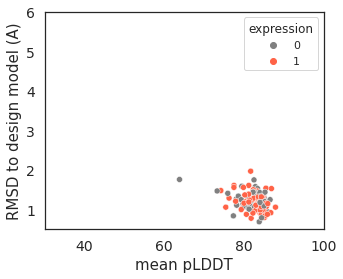

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="RMS_ESM", hue="expression", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6)
plt.xlim(30, 100)

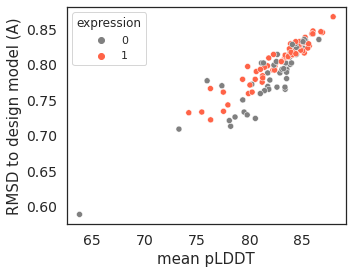

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="ptm", hue="expression", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 6)
#plt.xlim(30, 100)

(22.0, 95.0)

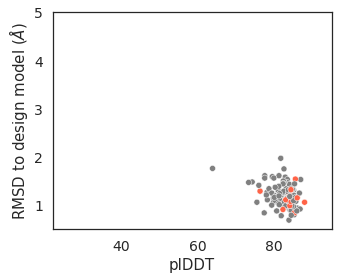

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="RMS_ESM", hue="folded (biochemical tests)", palette=cols,legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(22, 95)

(22.0, 95.0)

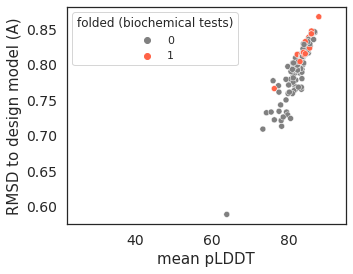

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="ptm", hue="folded (biochemical tests)", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 6.25)
plt.xlim(22, 95)

(30.0, 100.0)

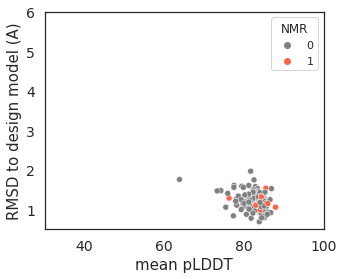

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_b, x="plDDT_backbone", y="RMS_ESM", hue="NMR", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6)
plt.xlim(30, 100)

In [ ]:
p_non_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 0), "plDDT_backbone"].values
p_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 1), "plDDT_backbone"].values

log_p_non_folded_ESM = np.log(p_non_folded_ESM)
log_p_folded_ESM = np.log(p_folded_ESM)

print("p_non_folded_ESM: ", normaltest(p_non_folded_ESM).pvalue)
print("p_folded_ESM: ", normaltest(p_folded_ESM).pvalue)
print()
print("Log(p_non_folded_ESM): ", normaltest(log_p_non_folded_ESM).pvalue)
print("Log(p_folded_ESM): ", normaltest(log_p_folded_ESM).pvalue)

p_non_folded_ESM:  1.1073896695622037e-14
p_folded_ESM:  5.677108833674137e-05

Log(p_non_folded_ESM):  1.518690640345043e-17
Log(p_folded_ESM):  2.3271755789459837e-05


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
r_non_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 0), "RMS_ESM"].values
r_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 1), "RMS_ESM"].values

log_r_non_folded_ESM = np.log(r_non_folded_ESM)
log_r_folded_ESM = np.log(r_folded_ESM)

print("r_non_folded_ESM: ", normaltest(r_non_folded_ESM).pvalue)
print("r_folded_ESM: ", normaltest(r_folded_ESM).pvalue)
print()
print("Log(r_non_folded_ESM): ", normaltest(log_r_non_folded_ESM).pvalue)
print("Log(r_folded_ESM): ", normaltest(log_r_folded_ESM).pvalue)

r_non_folded_ESM:  0.15515550430156708
r_folded_ESM:  0.2413279240962705

Log(r_non_folded_ESM):  0.9063695449758287
Log(r_folded_ESM):  0.5894993660710848


In [ ]:
t_non_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 0), "ptm"].values
t_folded_ESM = df_ESM_b.loc[(df_ESM_b['folded (biochemical tests)'] == 1), "ptm"].values

log_t_non_folded_ESM = np.log(t_non_folded_ESM)
log_t_folded_ESM = np.log(t_folded_ESM)

print("t_non_folded_ESM: ", normaltest(t_non_folded_ESM).pvalue)
print("t_folded_ESM: ", normaltest(t_folded_ESM).pvalue)
print()
print("Log(t_non_folded_ESM): ", normaltest(log_t_non_folded_ESM).pvalue)
print("Log(t_folded_ESM): ", normaltest(log_t_folded_ESM).pvalue)

t_non_folded_ESM:  2.715748386989087e-11
t_folded_ESM:  0.11773223527811524

Log(t_non_folded_ESM):  1.0095919052876926e-14
Log(t_folded_ESM):  0.07589796100165501


In [ ]:
stat_results_ESM_plDDT = [mannwhitneyu(p_non_folded_ESM, p_folded_ESM, alternative="two-sided")]
pvalues_ESM_plDDT = [result.pvalue for result in stat_results_ESM_plDDT]
print("non folded vs folded ESMFold plDDT:", stat_results_ESM_plDDT[0])

stat_results_ESM_RMS = [mannwhitneyu(r_non_folded_ESM, r_folded_ESM, alternative="two-sided")]
pvalues_ESM_RMS = [result.pvalue for result in stat_results_ESM_RMS]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_RMS[0])

stat_results_ESM_TM = [mannwhitneyu(t_non_folded_ESM, t_folded_ESM, alternative="two-sided")]
pvalues_ESM_TM = [result.pvalue for result in stat_results_ESM_TM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_TM[0])

stat_results_ESM_plDDT_BM = [brunnermunzel(p_non_folded_ESM, p_folded_ESM, alternative="two-sided")]
pvalues_ESM_plDDT_BM = [result.pvalue for result in stat_results_ESM_plDDT_BM]
print("non folded vs folded ESMFold plDDT unequal variance:", stat_results_ESM_plDDT_BM[0])

stat_results_ESM_RMS_BM = [brunnermunzel(r_non_folded_ESM, r_folded_ESM, alternative="two-sided")]
pvalues_ESM_RMS_BM = [result.pvalue for result in stat_results_ESM_RMS_BM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_RMS_BM[0])

stat_results_ESM_TM_BM = [brunnermunzel(t_non_folded_ESM, t_folded_ESM, alternative="two-sided")]
pvalues_ESM_TM_BM = [result.pvalue for result in stat_results_ESM_TM_BM]
print("non folded vs folded pTM ESMFold prediction to design model:", stat_results_ESM_TM_BM[0])

stat_results_ESM_plDDT_perm = [permutation_test(p_non_folded_ESM, p_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_plDDT_perm[0]:.4f}")

stat_results_ESM_RMS_perm = [permutation_test(r_non_folded_ESM, r_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_RMS_perm[0]:.4f}")

stat_results_ESM_TM_perm = [permutation_test(t_non_folded_ESM, t_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_TM_perm[0]:.4f}")

non folded vs folded ESMFold plDDT: MannwhitneyuResult(statistic=458.0, pvalue=0.00703598414242999)
non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=928.0, pvalue=0.27340139207655545)
non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=393.0, pvalue=0.0012767176305701479)
non folded vs folded ESMFold plDDT unequal variance: BrunnerMunzelResult(statistic=3.1221452376023135, pvalue=0.004904291184540499)
non folded vs folded RMSD ESMFold prediction to design model: BrunnerMunzelResult(statistic=-1.2905485071489304, pvalue=0.20740105686132598)
non folded vs folded pTM ESMFold prediction to design model: BrunnerMunzelResult(statistic=4.350449346016061, pvalue=0.00017571674612337773)
Permutation test: p-value=0.0275
Permutation test: p-value=0.2766
Permutation test: p-value=0.0031


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:7.036e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

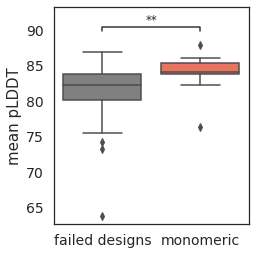

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:7.036e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

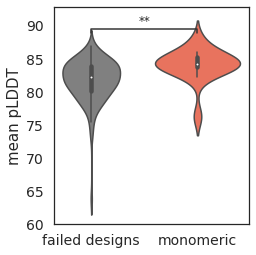

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_plDDT]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.734e-01


(0.5, 5.7)

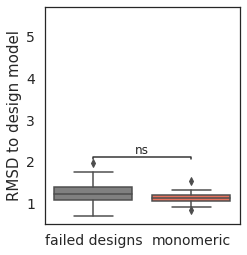

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'RMS_ESM',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.734e-01


(0.5, 5.7)

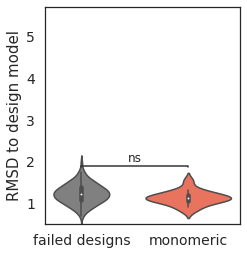

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'RMS_ESM',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_RMS]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:1.277e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

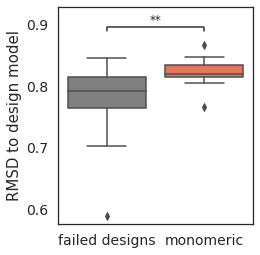

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'ptm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_TM]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_TM)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:1.277e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

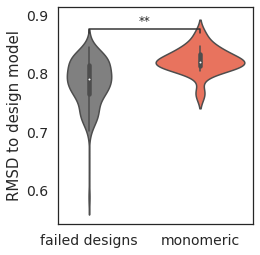

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM,
    'x':       'folded (biochemical tests)',
    'y':       'ptm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_TM]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_TM)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(0.5, 5.7)

In [ ]:
df_ESM_filtered = df_ESM.loc[(df_ESM["beta_sheet"]<51) & (df_ESM["aggregation"]<1760) ]
df_ESM_filtered.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_3CD_updated.csv")

<AxesSubplot:xlabel='plDDT_all', ylabel='RMS_ESM'>

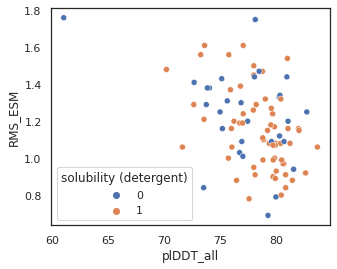

In [ ]:
sns.scatterplot(data=df_ESM_filtered, x="plDDT_all", y="RMS_ESM", hue="solubility (detergent)")

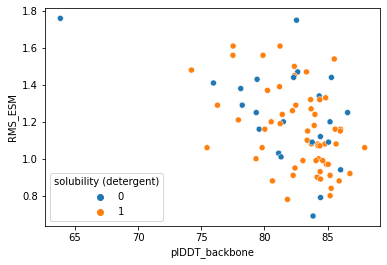

In [ ]:
sns.scatterplot(data=df_ESM_filtered, x="plDDT_backbone", y="RMS_ESM", hue="solubility (detergent)")

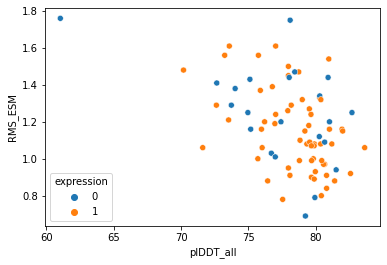

In [ ]:
sns.scatterplot(data=df_ESM_filtered, x="plDDT_all", y="RMS_ESM", hue="expression")

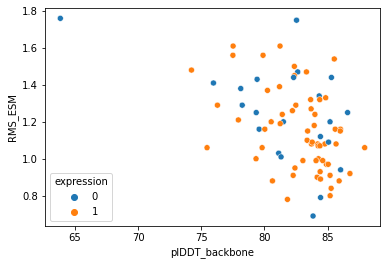

In [ ]:
sns.scatterplot(data=df_ESM_filtered, x="plDDT_backbone", y="RMS_ESM", hue="expression")

(30.0, 95.0)

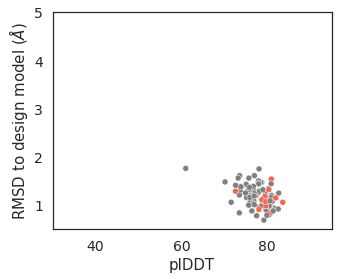

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filtered, x="plDDT_all", y="RMS_ESM", hue="folded (biochemical tests)", palette=cols,legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 95)

(30.0, 95.0)

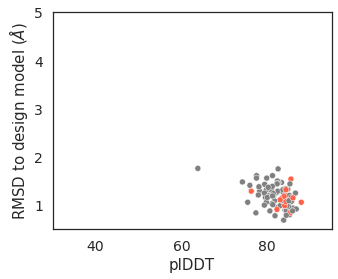

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filtered, x="plDDT_backbone", y="RMS_ESM", hue="folded (biochemical tests)", palette=cols,legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 95)

(22.0, 95.0)

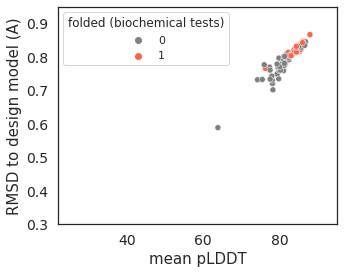

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filtered, x="plDDT_backbone", y="ptm", hue="folded (biochemical tests)", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.3, 0.95)
plt.xlim(22, 95)

(0.3, 0.95)

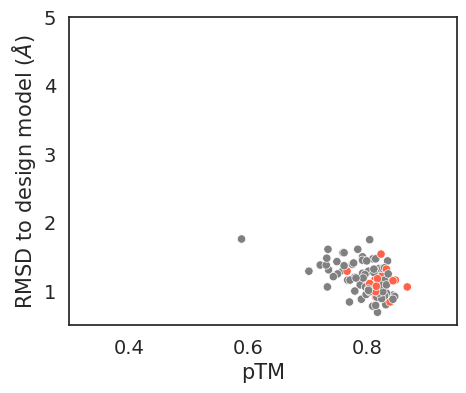

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filtered, x="ptm", y="RMS_ESM", hue="folded (biochemical tests)", palette=cols,legend=None)
ax.set_xlabel("pTM",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(0.3, 0.95)

(30.0, 100.0)

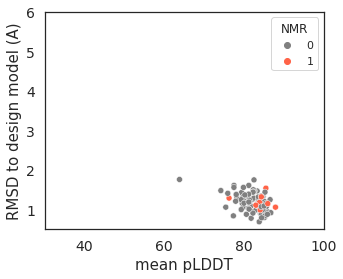

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']

ax=sns.scatterplot(data=df_ESM_filtered, x="plDDT_backbone", y="RMS_ESM", hue="NMR", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6)
plt.xlim(30, 100)

In [ ]:
p_non_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 0), "plDDT_backbone"].values
p_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 1), "plDDT_backbone"].values

log_p_non_folded_ESM = np.log(p_non_folded_ESM)
log_p_folded_ESM = np.log(p_folded_ESM)

print("p_non_folded_ESM: ", normaltest(p_non_folded_ESM).pvalue)
print("p_folded_ESM: ", normaltest(p_folded_ESM).pvalue)
print()
print("Log(p_non_folded_ESM): ", normaltest(log_p_non_folded_ESM).pvalue)
print("Log(p_folded_ESM): ", normaltest(log_p_folded_ESM).pvalue)

p_non_folded_ESM:  1.1954338652841811e-11
p_folded_ESM:  5.677108833674137e-05

Log(p_non_folded_ESM):  4.0245915495690174e-14
Log(p_folded_ESM):  2.3271755789459837e-05


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
r_non_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 0), "RMS_ESM"].values
r_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 1), "RMS_ESM"].values

log_r_non_folded_ESM = np.log(r_non_folded_ESM)
log_r_folded_ESM = np.log(r_folded_ESM)

print("r_non_folded_ESM: ", normaltest(r_non_folded_ESM).pvalue)
print("r_folded_ESM: ", normaltest(r_folded_ESM).pvalue)
print()
print("Log(r_non_folded_ESM): ", normaltest(log_r_non_folded_ESM).pvalue)
print("Log(r_folded_ESM): ", normaltest(log_r_folded_ESM).pvalue)

r_non_folded_ESM:  0.4645993862596295
r_folded_ESM:  0.2413279240962705

Log(r_non_folded_ESM):  0.48008155905546857
Log(r_folded_ESM):  0.5894993660710848


In [ ]:
t_non_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 0), "ptm"].values
t_folded_ESM = df_ESM_filtered.loc[(df_ESM_filtered['folded (biochemical tests)'] == 1), "ptm"].values

log_t_non_folded_ESM = np.log(t_non_folded_ESM)
log_t_folded_ESM = np.log(t_folded_ESM)

print("t_non_folded_ESM: ", normaltest(t_non_folded_ESM).pvalue)
print("t_folded_ESM: ", normaltest(t_folded_ESM).pvalue)
print()
print("Log(t_non_folded_ESM): ", normaltest(log_t_non_folded_ESM).pvalue)
print("Log(t_folded_ESM): ", normaltest(log_t_folded_ESM).pvalue)

t_non_folded_ESM:  5.2502572211917234e-11
t_folded_ESM:  0.11773223527811524

Log(t_non_folded_ESM):  8.854033737767487e-14
Log(t_folded_ESM):  0.07589796100165501


In [ ]:
stat_results_ESM_plDDT = [mannwhitneyu(p_non_folded_ESM, p_folded_ESM, alternative="two-sided")]
pvalues_ESM_plDDT = [result.pvalue for result in stat_results_ESM_plDDT]
print("non folded vs folded ESMFold plDDT:", stat_results_ESM_plDDT[0])

stat_results_ESM_RMS = [mannwhitneyu(r_non_folded_ESM, r_folded_ESM, alternative="two-sided")]
pvalues_ESM_RMS = [result.pvalue for result in stat_results_ESM_RMS]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_RMS[0])

stat_results_ESM_TM = [mannwhitneyu(t_non_folded_ESM, t_folded_ESM, alternative="two-sided")]
pvalues_ESM_TM = [result.pvalue for result in stat_results_ESM_TM]
print("non folded vs folded pTM ESMFold prediction to design model:", stat_results_ESM_TM[0])

stat_results_ESM_plDDT_BM = [brunnermunzel(p_non_folded_ESM, p_folded_ESM, alternative="two-sided")]
pvalues_ESM_plDDT_BM = [result.pvalue for result in stat_results_ESM_plDDT_BM]
print("non folded vs folded ESMFold plDDT unequal variance:", stat_results_ESM_plDDT_BM[0])

stat_results_ESM_RMS_BM = [brunnermunzel(r_non_folded_ESM, r_folded_ESM, alternative="two-sided")]
pvalues_ESM_RMS_BM = [result.pvalue for result in stat_results_ESM_RMS_BM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_RMS_BM[0])

stat_results_ESM_plDDT_perm = [permutation_test(p_non_folded_ESM, p_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_plDDT_perm[0]:.4f}")

stat_results_ESM_RMS_perm = [permutation_test(r_non_folded_ESM, r_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_RMS_perm[0]:.4f}")

stat_results_ESM_TM_perm = [permutation_test(t_non_folded_ESM, t_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_TM_perm[0]:.4f}")

non folded vs folded ESMFold plDDT: MannwhitneyuResult(statistic=359.0, pvalue=0.014140075737033048)
non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=668.0, pvalue=0.42546742985076424)
non folded vs folded pTM ESMFold prediction to design model: MannwhitneyuResult(statistic=321.5, pvalue=0.004368000268565206)
non folded vs folded ESMFold plDDT unequal variance: BrunnerMunzelResult(statistic=2.859142142614669, pvalue=0.008049333747831122)
non folded vs folded RMSD ESMFold prediction to design model: BrunnerMunzelResult(statistic=-0.9413033661235818, pvalue=0.352647763830801)
Permutation test: p-value=0.0251
Permutation test: p-value=0.4364
Permutation test: p-value=0.0105


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:1.414e-02


(30.0, 102.0)

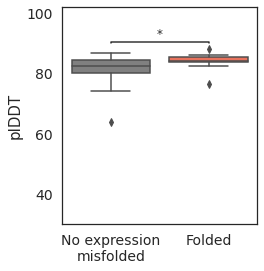

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("plDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:4.255e-01


(0.5, 5.7)

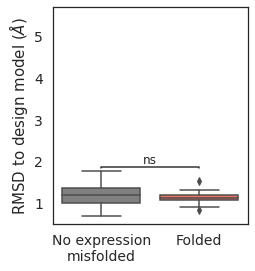

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'RMS_ESM',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:4.368e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

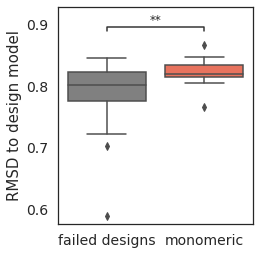

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'ptm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_TM]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_TM)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:4.368e-03


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

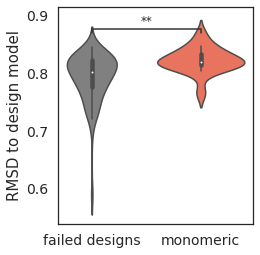

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'ptm',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_TM]

# Plot with seaborn
ax=sns.violinplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_TM)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(0.5, 5.7)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.560e-02


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

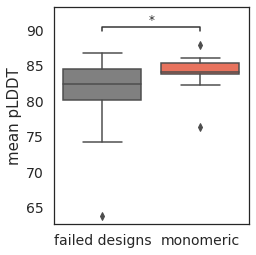

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'folded (biochemical tests)',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in stat_results_ESM_plDDT_perm]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(stat_results_ESM_plDDT_perm)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(30, 102)

In [ ]:
p_non_NMR_ESM = df_ESM_filtered.loc[(df_ESM_filtered['NMR'] == 0), "plDDT_backbone"].values
p_NMR_ESM = df_ESM_filtered.loc[(df_ESM_filtered['NMR'] == 1), "plDDT_backbone"].values

log_p_non_NMR_ESM = np.log(p_non_NMR_ESM)
log_p_NMR_ESM = np.log(p_NMR_ESM)

print("p_non_NMR_ESM: ", normaltest(p_non_NMR_ESM).pvalue)
print("p_NMR_ESM: ", normaltest(p_NMR_ESM).pvalue)
print()
print("Log(p_non_NMR_ESM): ", normaltest(log_p_non_NMR_ESM).pvalue)
print("Log(p_NMR_ESM): ", normaltest(log_p_NMR_ESM).pvalue)

p_non_NMR_ESM:  1.1960066298440764e-12
p_NMR_ESM:  0.0011172616392627283

Log(p_non_NMR_ESM):  2.9817403341862657e-15
Log(p_NMR_ESM):  0.000604234691670146


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
r_non_NMR_ESM = df_ESM_filtered.loc[(df_ESM_filtered.NMR == 0), "RMS_ESM"].values
r_NMR_ESM = df_ESM_filtered.loc[(df_ESM_filtered.NMR == 1), "RMS_ESM"].values

log_r_non_NMR_ESM = np.log(r_non_NMR_ESM)
log_r_NMR_ESM = np.log(r_NMR_ESM)

print("r_non_NMR_ESM: ", normaltest(r_non_NMR_ESM).pvalue)
print("r_NMR_ESM: ", normaltest(r_NMR_ESM).pvalue)
print()
print("Log(r_non_folded_ESM): ", normaltest(log_r_non_folded_ESM).pvalue)
print("Log(r_folded_ESM): ", normaltest(log_r_folded_ESM).pvalue)

r_non_NMR_ESM:  0.4208369248624071
r_NMR_ESM:  0.0953137974811218

Log(r_non_folded_ESM):  0.48008155905546857
Log(r_folded_ESM):  0.5894993660710848


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
stat_results_NMR_ESM_plDDT = [mannwhitneyu(p_non_NMR_ESM, p_NMR_ESM, alternative="two-sided")]
pvalues_ESM_NMR_plDDT = [result.pvalue for result in stat_results_NMR_ESM_plDDT]
print("non folded vs folded ESMFold plDDT:", stat_results_NMR_ESM_plDDT[0])

stat_results_NMR_ESM_RMS = [mannwhitneyu(r_non_NMR_ESM, r_NMR_ESM, alternative="two-sided")]
pvalues_ESM_NMR_RMS = [result.pvalue for result in stat_results_NMR_ESM_RMS]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_NMR_ESM_RMS[0])

stat_results_NMR_ESM_plDDT_BM = [brunnermunzel(p_non_NMR_ESM, p_NMR_ESM, alternative="two-sided")]
pvalues_ESM_NMR_plDDT_BM = [result.pvalue for result in stat_results_NMR_ESM_plDDT_BM]
print("non folded vs folded ESMFold plDDT unequal variance:", stat_results_NMR_ESM_plDDT_BM[0])

stat_results_NMR_ESM_RMS_BM = [brunnermunzel(r_non_NMR_ESM, r_NMR_ESM, alternative="two-sided")]
pvalues_ESM_NMR_RMS_BM = [result.pvalue for result in stat_results_NMR_ESM_RMS_BM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_NMR_ESM_RMS_BM[0])

non folded vs folded ESMFold plDDT: MannwhitneyuResult(statistic=261.0, pvalue=0.07537377698433524)
non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=387.5, pvalue=0.8775293638775561)
non folded vs folded ESMFold plDDT unequal variance: BrunnerMunzelResult(statistic=1.8960095054875579, pvalue=0.08233177776299305)
non folded vs folded RMSD ESMFold prediction to design model: BrunnerMunzelResult(statistic=0.20084830348817273, pvalue=0.8431010866064814)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:7.537e-02


[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

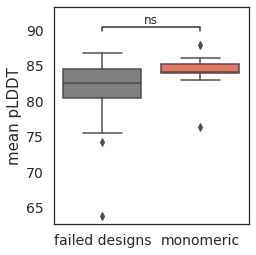

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'NMR',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_NMR_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_NMR_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("mean pLDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
#plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:8.775e-01


(0.5, 5.7)

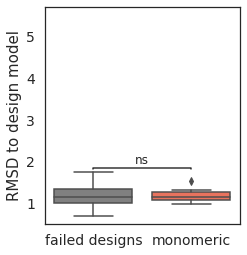

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ESM_filtered,
    'x':       'NMR',
    'y':       'RMS_ESM',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_NMR_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_NMR_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])
plt.ylim(0.5, 5.7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import pickle

# Load data from the pickle file
with open('/content/drive/MyDrive/AF_vs_ESMF/TMB8_10/df_ESM.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Specify the file path and name for the CSV file
csv_file_path = '/content/drive/MyDrive/AF_vs_ESMF/TMB8_10/df_ESM.csv'

# Export the DataFrame to CSV
df.to_csv(csv_file_path)

print("Data exported successfully from pickle to CSV.")

Data exported successfully from pickle to CSV.


In [ ]:
cd /content/drive/MyDrive/AF_vs_ESMF/TMB8_10



NameError: ignored